In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data.csv')
data.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CoffeeHouse  \
0         1d  Female  21  Unmarried partner             1  ...       never   
1         2h  Female  21  Unmarried partner             1  ...       never   
2         2h  Female  21  Unmarried partner             1  ...       never   
3         2h  Female  21  Unmarried partner             1  ...       never   
4         1d  Female  21  Unmarried partner             1  ...       never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       NaN                  4~8              1~3                1   
1       NaN                  4~8              1~3                1   
2       NaN                  4~8              1~3                1   
3       NaN                  4~8              1~3                1   
4       NaN                  4~8              1~3                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  \
0                 0                 0              0             1   
1                 0                 0              0             1   
2                 1                 0              0             1   
3                 1                 0              0             1   
4                 1                 0              0             1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 25 columns]

In [3]:
data.shape

(12684, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

## Data Preprocessing

1. Check for missing values

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [6]:
(data.isnull().sum()/len(data))*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [7]:
# Feature car has 99% of missing data, hence that variable can be dropped

data = data.drop(['car'],axis = 1)
data.shape

(12684, 24)

In [8]:
# Other features with missing data 
# Bar                      0.843582
# CoffeeHouse              1.710817
# CarryAway                1.190476
# RestaurantLessThan20     1.024913
# Restaurant20To50         1.490066

In [9]:
# Finding data type for imputing the missing values 
print(data['Bar'].dtype)
data['Bar'].describe()

object


count     12577
unique        5
top       never
freq       5197
Name: Bar, dtype: object

In [10]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [11]:
# Since 'Bar' feature is an object type , imputing the missing values with mode 

data['Bar'] = data['Bar'].fillna('never')

In [12]:
print(data['CoffeeHouse'].dtype)
data['CoffeeHouse'].describe()

object


count     12467
unique        5
top       less1
freq       3385
Name: CoffeeHouse, dtype: object

In [13]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [14]:
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')

In [15]:
print(data['CarryAway'].dtype)

object


In [16]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [17]:
data['CarryAway'] = data['CarryAway'].fillna('1~3')
data['CarryAway'].isnull().sum()

np.int64(0)

In [18]:
data['RestaurantLessThan20'].dtype

dtype('O')

In [19]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [20]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')
data['RestaurantLessThan20'].isnull().sum()

np.int64(0)

In [21]:
data['Restaurant20To50'].dtype

dtype('O')

In [22]:
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [23]:
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')
data['Restaurant20To50'].isnull().sum()

np.int64(0)

In [24]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [25]:
#All missing values are treated 

In [26]:
# To see if there are any unexpected formats in the data set 

for i in data.columns :
    print('--------------------------------------- ' , i , 
          '---------------------------------------------')
    print()
    print(set(data[i].tolist()))

---------------------------------------  destination ---------------------------------------------

{'No Urgent Place', 'Home', 'Work'}
---------------------------------------  passanger ---------------------------------------------

{'Kid(s)', 'Partner', 'Alone', 'Friend(s)'}
---------------------------------------  weather ---------------------------------------------

{'Sunny', 'Snowy', 'Rainy'}
---------------------------------------  temperature ---------------------------------------------

{80, 30, 55}
---------------------------------------  coupon ---------------------------------------------

{'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Bar', 'Restaurant(20-50)'}
---------------------------------------  expiration ---------------------------------------------

{'2h', '1d'}
---------------------------------------  gender ---------------------------------------------

{'Male', 'Female'}
---------------------------------------  age ------------------------------

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


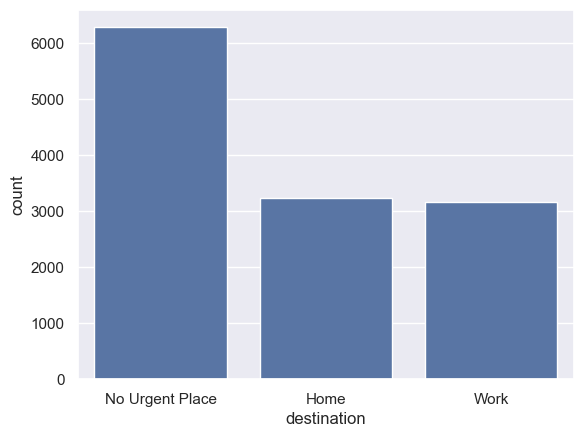

In [27]:
# Seing the destination variable 
# How are customers accepting the coupons ?
# if it is on the way home , or if when have no urgent place to go
print(data['destination'].value_counts())
sns.countplot(x = 'destination' , data = data)
plt.show()

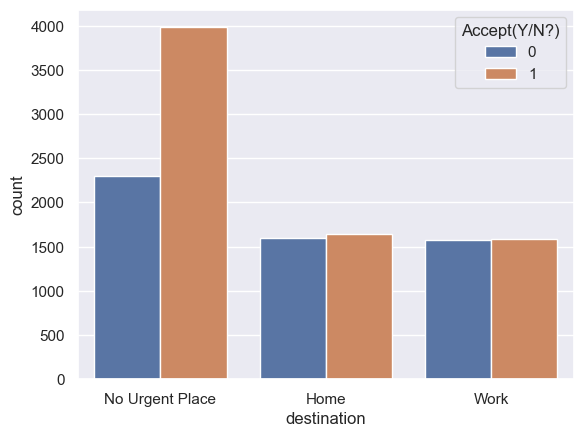

In [28]:
# We see that most of the customers driving are not in a hurry to go to work or home 
# Let us see the acceptance of coupon by such customers

sns.countplot(x = 'destination' , hue = 'Accept(Y/N?)' , data = data)
plt.show() 

In [29]:
print(len(data[(data['destination'] == 'No Urgent Place') & (data['Accept(Y/N?)'] == 1)]))

3982


We see that 3982 Customers who are travelling elsewhere, apart from Home or work, have accepted coupons

In [30]:
print(len(data[(data['destination'] == 'Home') & (data['Accept(Y/N?)'] == 1)]))

1639


We see that 1639 Customers who are travelling to Home have accepted coupons

In [31]:
print(len(data[(data['destination'] == 'Work') & (data['Accept(Y/N?)'] == 1)]))

1589


We see that 1589 Customers who are travelling to work have accepted coupons

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


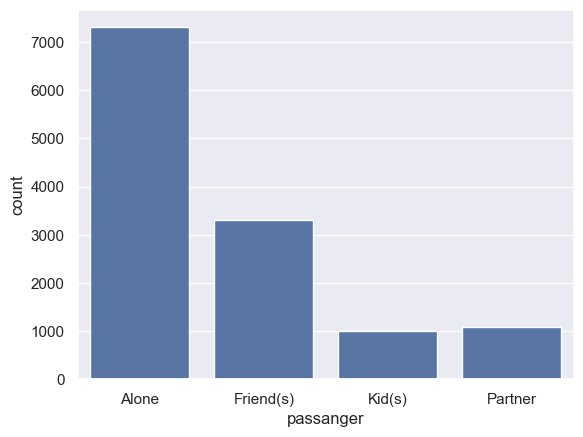

In [32]:
# Passanger 
print(data['passanger'].value_counts())
sns.countplot(x = 'passanger' , data = data)
plt.show()

Most customers are travelling alone

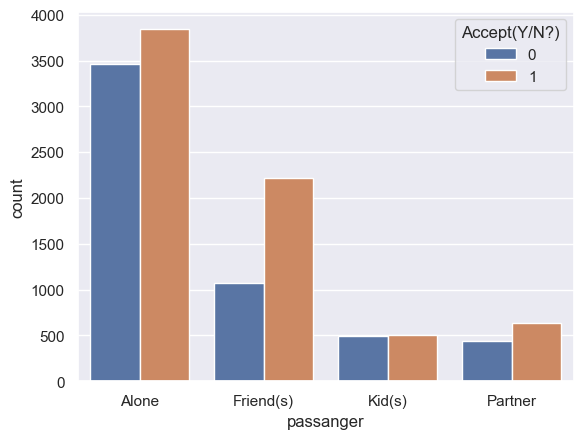

In [33]:
sns.countplot(x = 'passanger' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

We can observe that coupon acceptance rate is more with passengers travelling alone

In [34]:
# Given weather feature

for i in data.select_dtypes(include = ['object']).columns:
    sns.boxplot

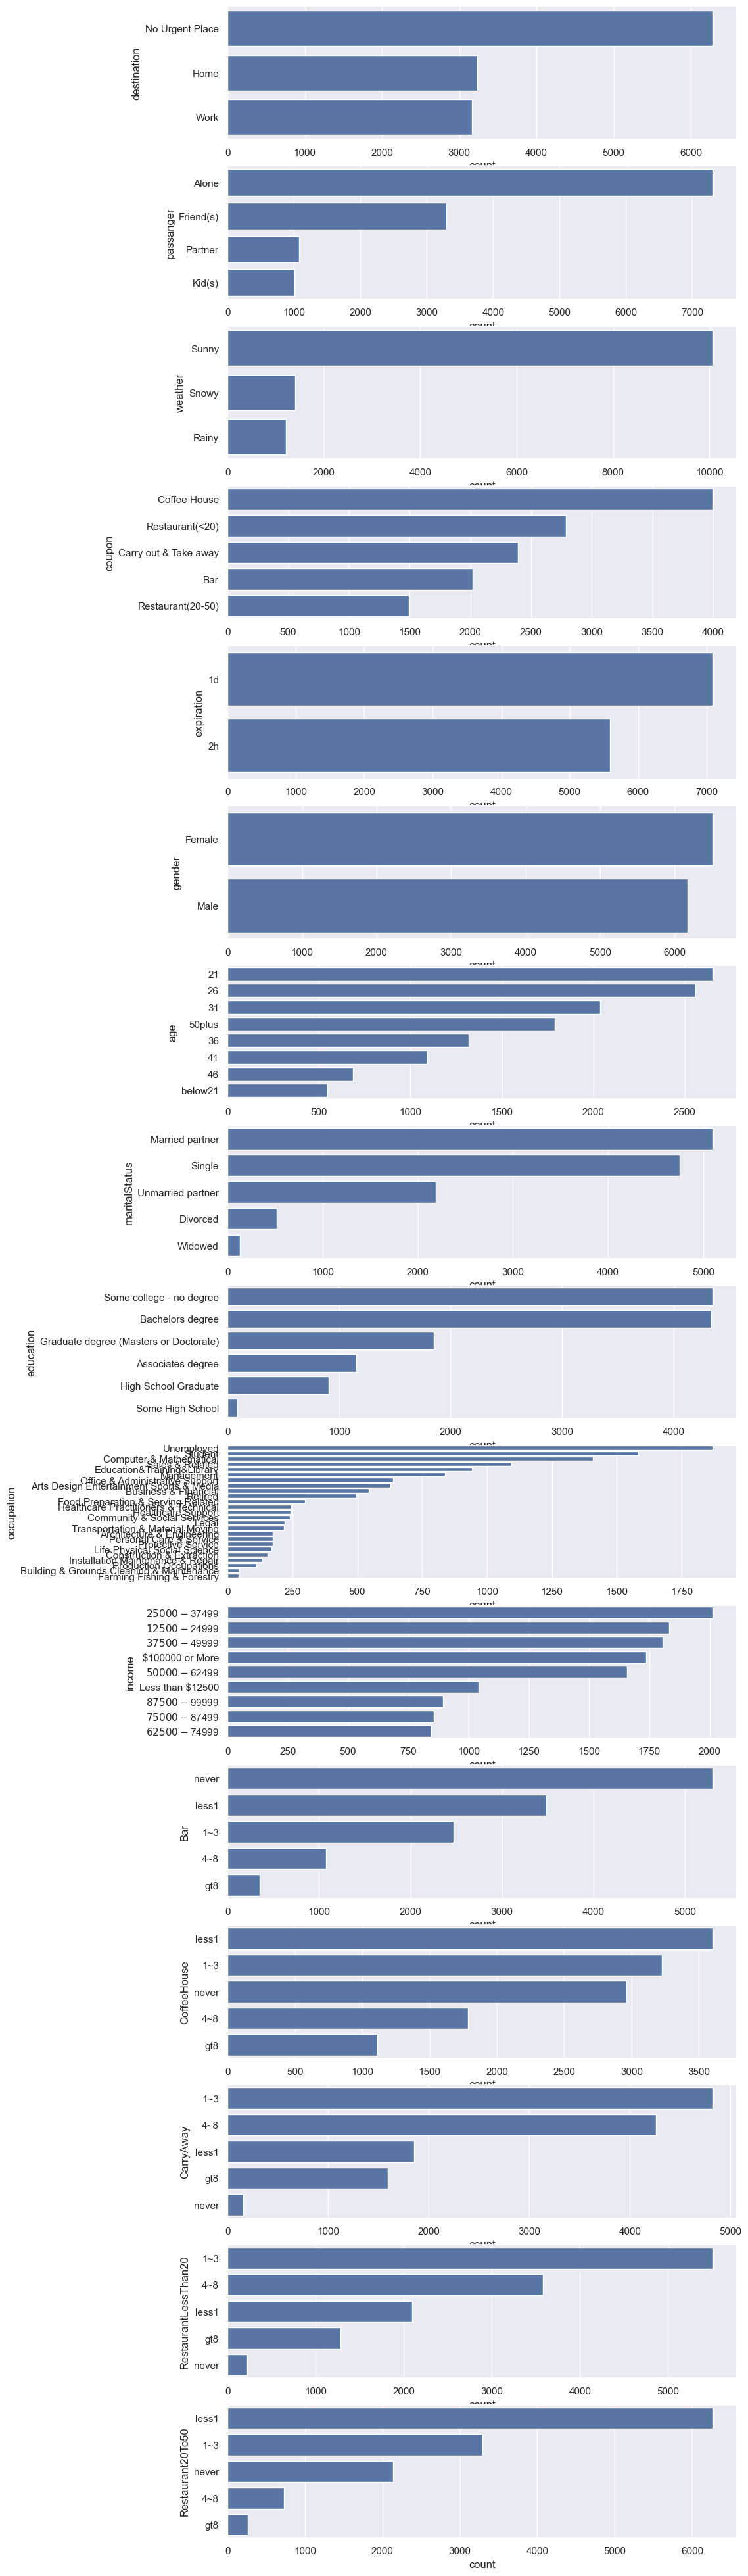

In [35]:
pd.set_option('display.max_rows' , 20)
fig , axes = plt.subplots(16 , 1 , figsize = (10,50))
axes = axes.flatten()

for ax , col in zip(axes , data.select_dtypes(include = ['object']).columns):
    sns.countplot( y = col , data = data , ax = ax , order = data[col].value_counts().index)
plt.show()

                 Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
destination                                                              
Home                     3237      1639      1598   50.633302   49.366698
No Urgent Place          6283      3982      2301   63.377367   36.622633
Work                     3164      1589      1575   50.221239   49.778761


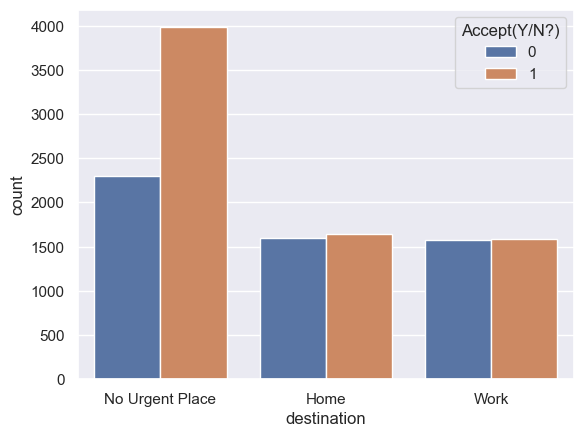

In [36]:
a = pd.DataFrame(data.groupby('destination')['Accept(Y/N?)'].count())
a['accepted'] = data[data['Accept(Y/N?)'] == 1].groupby('destination')['Accept(Y/N?)'].count()
a['rejected'] = data[data['Accept(Y/N?)'] == 0].groupby('destination')['Accept(Y/N?)'].count()
a['% Accepted'] = ((a['accepted']) / (a['Accept(Y/N?)']))*100
a['% Rejected'] = ((a['rejected']) / (a['Accept(Y/N?)']))*100
print(a)

sns.countplot(x = 'destination' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

We can observe that there is a high acceptance rate from people who have no urgent place to go with 63%.

People who are either on the way to home or Work have almost similar acceptance and rejection rates.

In [37]:
def grouping(col):
    a = pd.DataFrame(data.groupby(col)['Accept(Y/N?)'].count())
    a['accepted'] = data[data['Accept(Y/N?)'] == 1].groupby(col)['Accept(Y/N?)'].count()
    a['rejected'] = data[data['Accept(Y/N?)'] == 0].groupby(col)['Accept(Y/N?)'].count()
    a['% Accepted'] = ((a['accepted']) / (a['Accept(Y/N?)']))*100
    a['% Rejected'] = ((a['rejected']) / (a['Accept(Y/N?)']))*100
    return a 

In [38]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [39]:
grouping('passanger')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
passanger                                                          
Alone              7305      3841      3464   52.580424   47.419576
Friend(s)          3298      2221      1077   67.343845   32.656155
Kid(s)             1006       508       498   50.497018   49.502982
Partner            1075       640       435   59.534884   40.465116

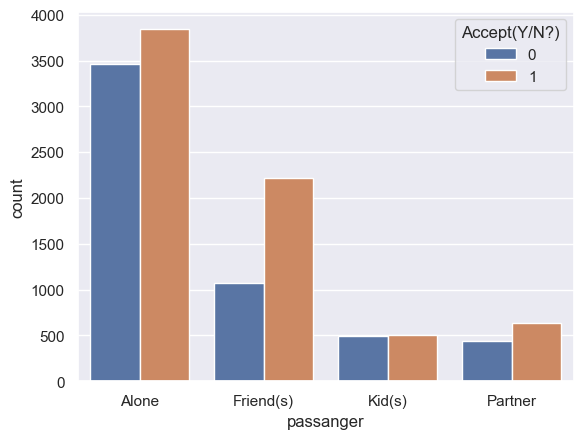

In [40]:
sns.countplot(x = 'passanger' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

Most of the passanger's are travelling alone.

But passangers with friends have high coupon acceptance chances with percentage of 67.3 and then passangers with partners also have coupon high acceptance range when compared to passangers travelling alone or with kids.

In [41]:
grouping('weather')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
weather                                                          
Rainy            1210       560       650   46.280992   53.719008
Snowy            1405       661       744   47.046263   52.953737
Sunny           10069      5989      4080   59.479591   40.520409

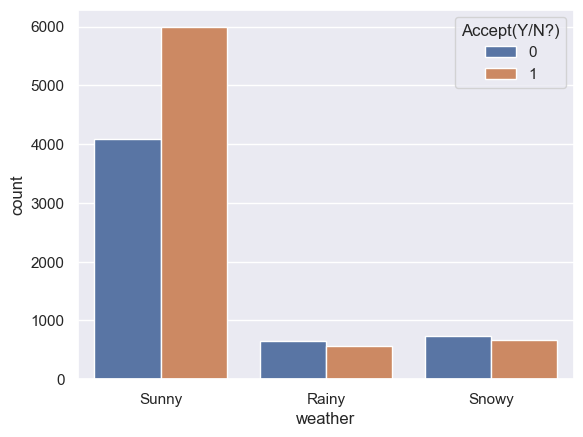

In [42]:
sns.countplot(x = 'weather' , hue = 'Accept(Y/N?)' , data = data)
plt.show()

Most customers are travelling in a sunny day and coupon accepting chances are also high when compared to other weather conditions.

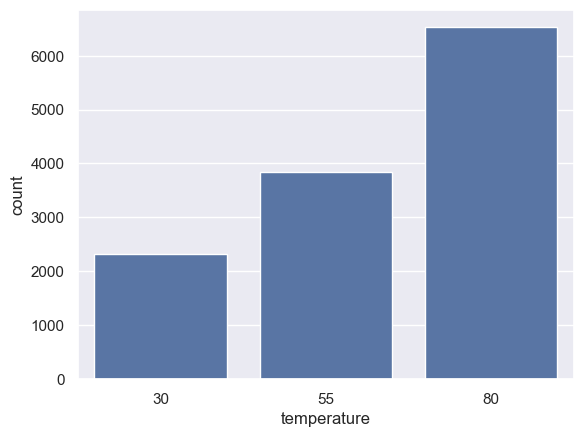

In [43]:
sns.countplot(x = 'temperature' , data = data)
plt.show()

Temperature is given in Farenheit and 80 F is a normal not so hot temperature where as 55 F is cold weather and 30 F is extreme cold.

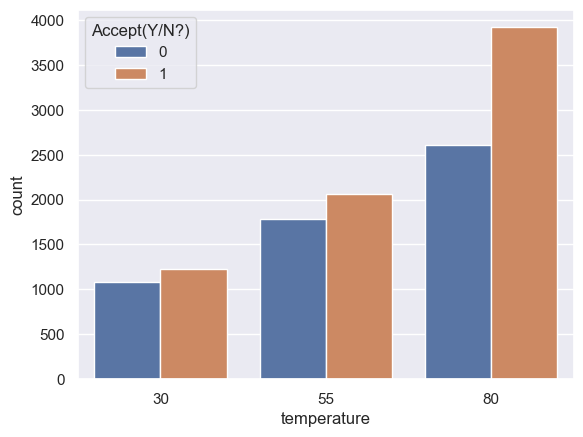

In [44]:
sns.countplot(x = 'temperature' , data = data , hue = 'Accept(Y/N?)' )
plt.show()

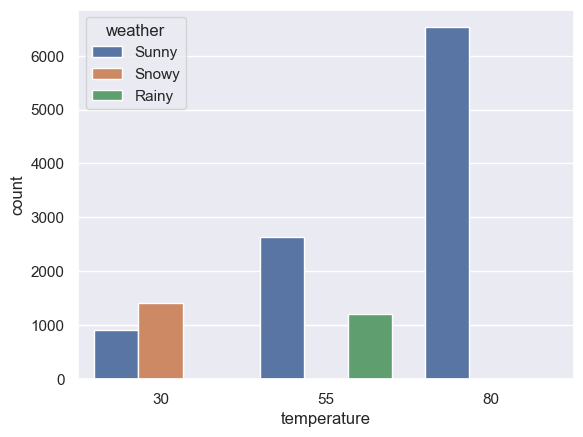

In [45]:
sns.countplot(x = 'temperature' , data = data , hue = 'weather')
plt.show()

In [46]:
grouping('temperature')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
temperature                                                          
30                   2316      1230      1086   53.108808   46.891192
55                   3840      2061      1779   53.671875   46.328125
80                   6528      3919      2609   60.033701   39.966299

We can observe that most customers are driving at a temperature of 80F and their coupon acceptance possibility is high when compared to other temperature conditions.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


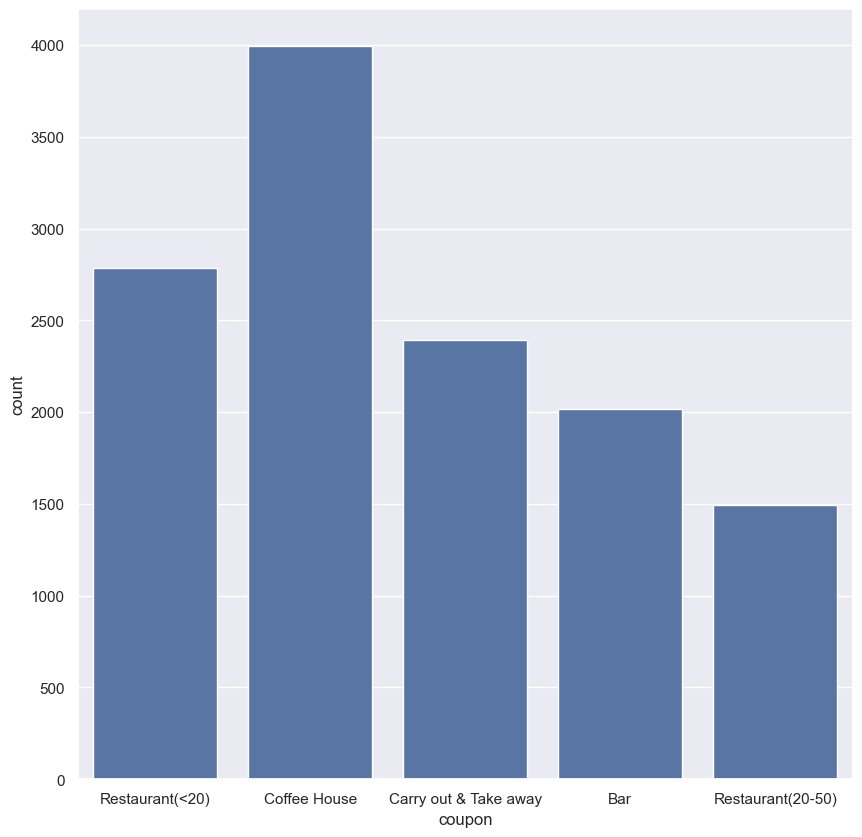

In [47]:
print(data['coupon'].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(x = 'coupon' , data = data)
plt.show()

We can see that most given coupons are for Coffee house and then Restaurant where average spend is less than 20 $.

In [48]:
grouping('coupon')

Accept(Y/N?)  accepted  rejected  % Accepted  \
coupon                                                                
Bar                            2017       827      1190   41.001487   
Carry out & Take away          2393      1760       633   73.547848   
Coffee House                   3996      1995      2001   49.924925   
Restaurant(20-50)              1492       658       834   44.101877   
Restaurant(<20)                2786      1970       816   70.710696   

                       % Rejected  
coupon                             
Bar                     58.998513  
Carry out & Take away   26.452152  
Coffee House            50.075075  
Restaurant(20-50)       55.898123  
Restaurant(<20)         29.289304

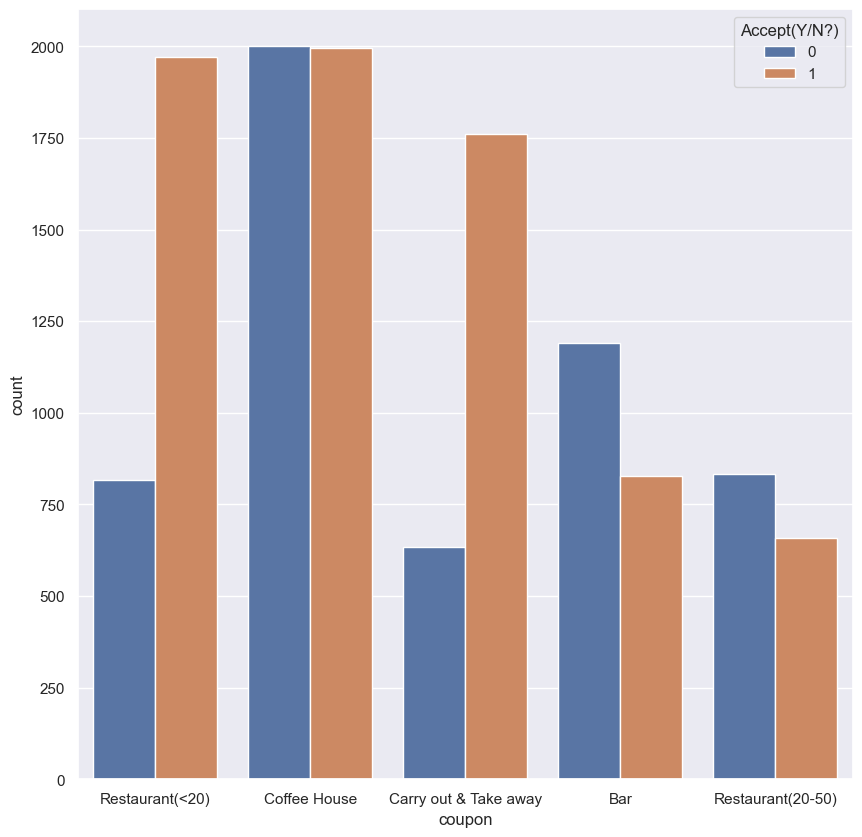

In [49]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'coupon' , data = data , hue = 'Accept(Y/N?)')
plt.show()

Most type of coupons given are Coffee House and Restaurant(<20) where as most accepted type coupon from customer is Carryout and Takeaway with 73% acceptance and second to that is coupons for restuarant (<20) with 70% acceptance.

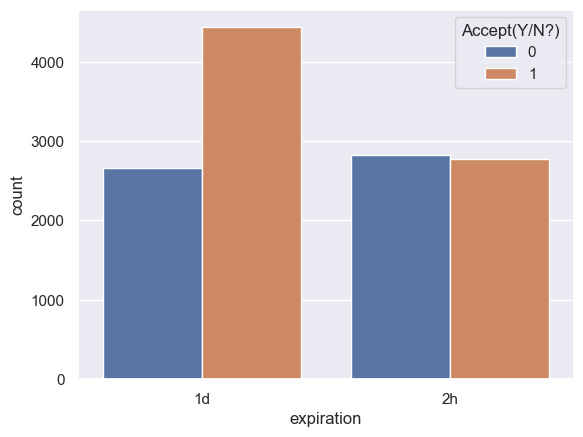

In [50]:
sns.countplot(x = 'expiration' , data = data , hue = 'Accept(Y/N?)')
plt.show()

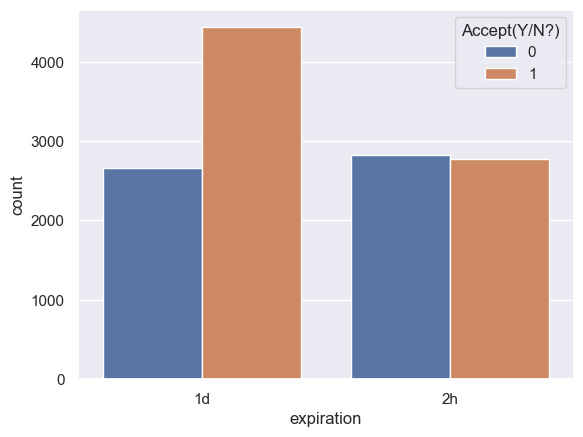

In [51]:
sns.countplot(x = 'expiration' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [52]:
grouping('expiration')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
expiration                                                          
1d                  7091      4436      2655   62.558172   37.441828
2h                  5593      2774      2819   49.597711   50.402289

Coupons that are having expiration in a single day are given more frequent and also accepted by most customers(62 %).

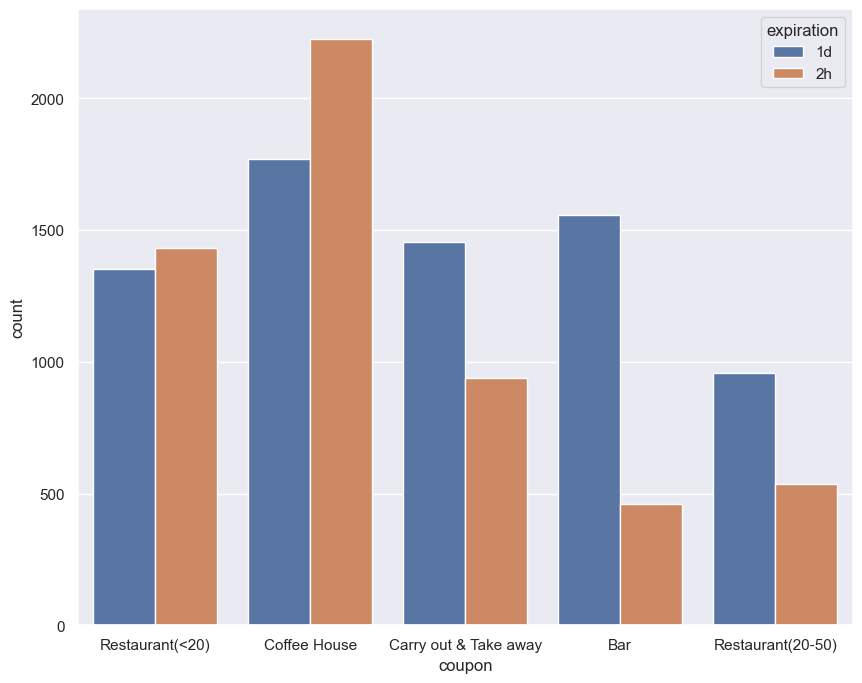

In [53]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'coupon' , data = data , hue = 'expiration')
plt.show()

In [54]:
pd.DataFrame(data.groupby('coupon')['expiration'].value_counts())

count
coupon                expiration       
Bar                   1d           1556
                      2h            461
Carry out & Take away 1d           1456
                      2h            937
Coffee House          2h           2227
                      1d           1769
Restaurant(20-50)     1d            956
                      2h            536
Restaurant(<20)       2h           1432
                      1d           1354

gender
Female    6511
Male      6173
Name: count, dtype: int64


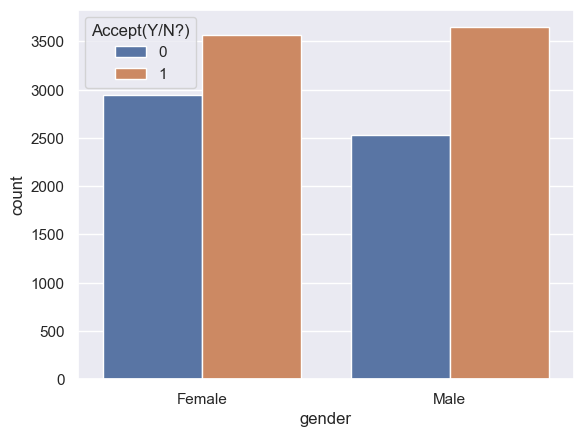

In [55]:
print(data['gender'].value_counts())
sns.countplot( x = 'gender' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [56]:
grouping('gender')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
gender                                                          
Female          6511      3563      2948   54.722777   45.277223
Male            6173      3647      2526   59.079864   40.920136

We can observe there is no much difference in coupon acceptance based on gender attribute.

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


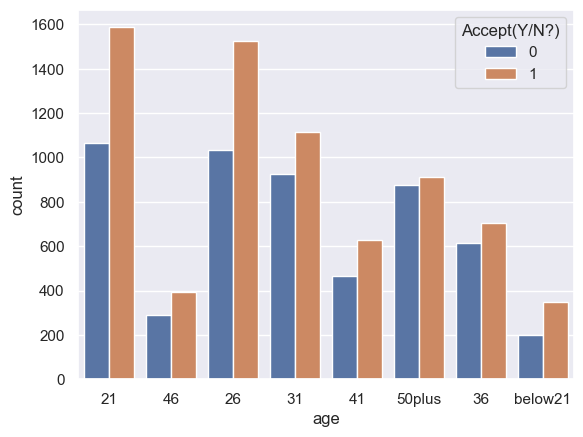

In [57]:
print(data['age'].value_counts())
sns.countplot( x = 'age' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [58]:
grouping('age')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
age                                                              
21               2653      1587      1066   59.819073   40.180927
26               2559      1525      1034   59.593591   40.406409
31               2039      1114       925   54.634625   45.365375
36               1319       706       613   53.525398   46.474602
41               1093       626       467   57.273559   42.726441
46                686       395       291   57.580175   42.419825
50plus           1788       910       878   50.894855   49.105145
below21           547       347       200   63.436929   36.563071

Majority of customers fall under the age limit of 21-26 , But most coupons are accepted by customers below 21 of age(63%) and almsot same acceptance value for age group 21-26(59%).

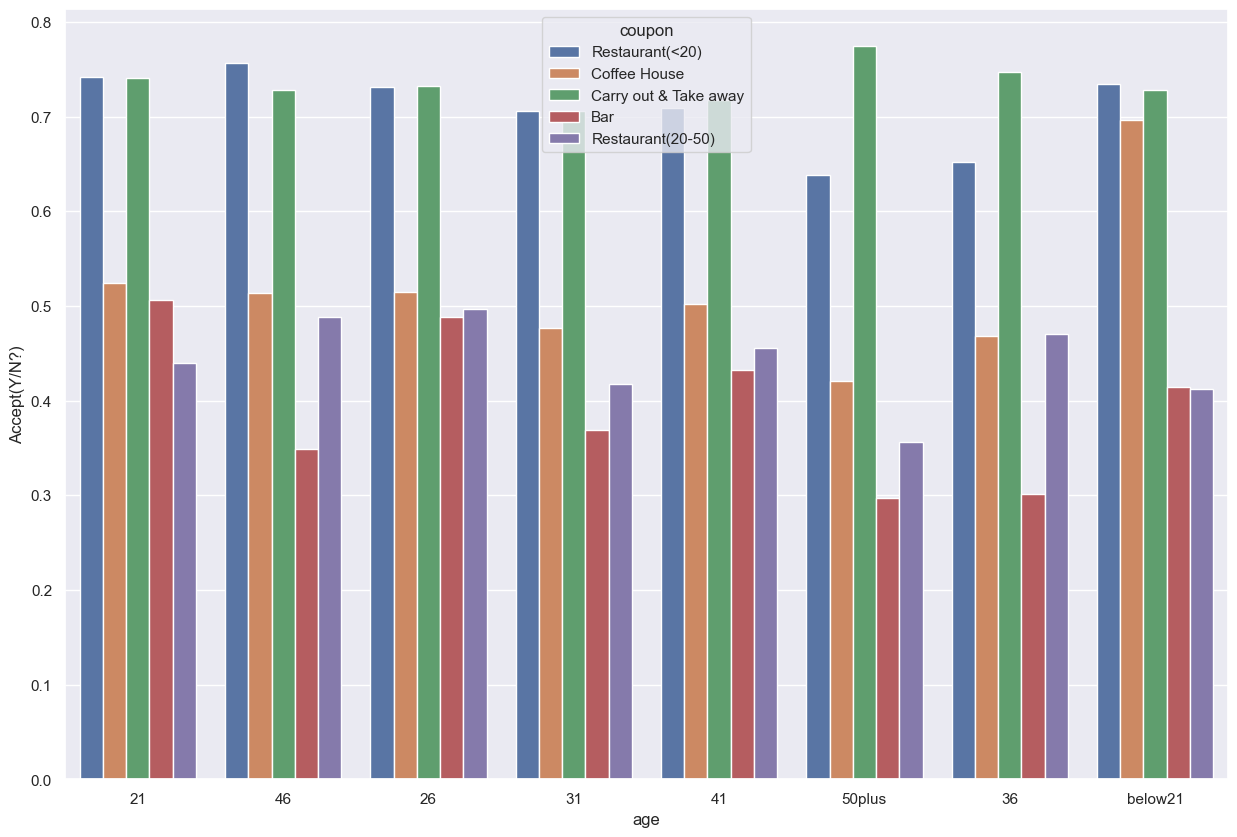

In [59]:
plt.figure(figsize = (15 , 10))
sns.barplot( x = 'age' , y ='Accept(Y/N?)', hue ='coupon', data = data , errorbar = None)
plt.show()

In [60]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


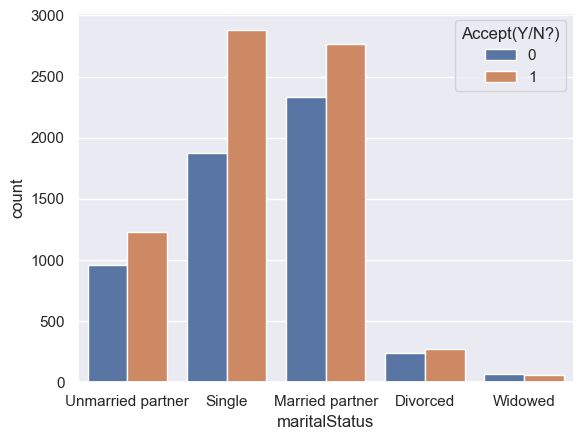

In [61]:
print(data['maritalStatus'].value_counts())
sns.countplot( x = 'maritalStatus' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [62]:
grouping('maritalStatus')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
maritalStatus                                                              
Divorced                    516       273       243   52.906977   47.093023
Married partner            5100      2769      2331   54.294118   45.705882
Single                     4752      2879      1873   60.585017   39.414983
Unmarried partner          2186      1227       959   56.129918   43.870082
Widowed                     130        62        68   47.692308   52.307692

Coupon acceptance is high amongst customers who are single and also customer with unmarried partner.

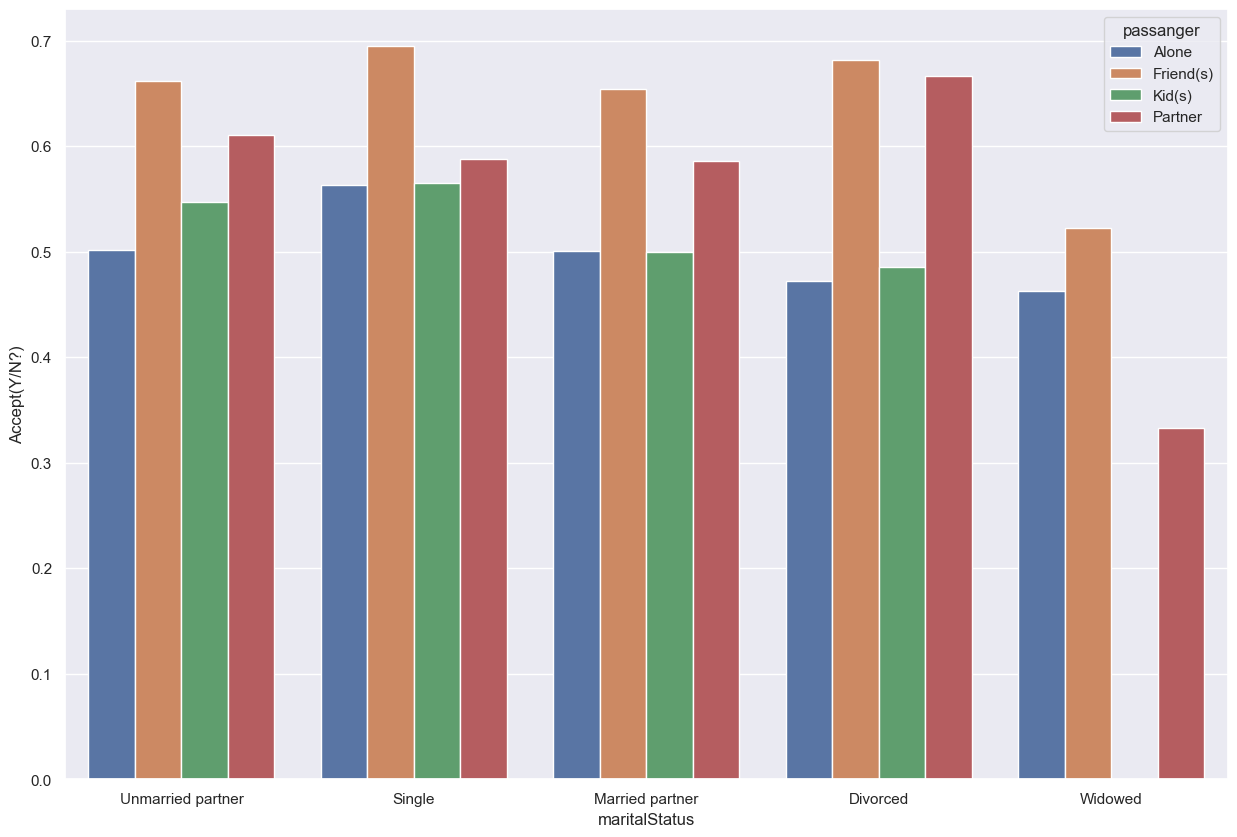

In [63]:
plt.figure(figsize = (15 , 10))
sns.barplot( x = 'maritalStatus' , y ='Accept(Y/N?)', hue ='passanger', data = data , errorbar = None)
plt.show()

has_children
0    7431
1    5253
Name: count, dtype: int64


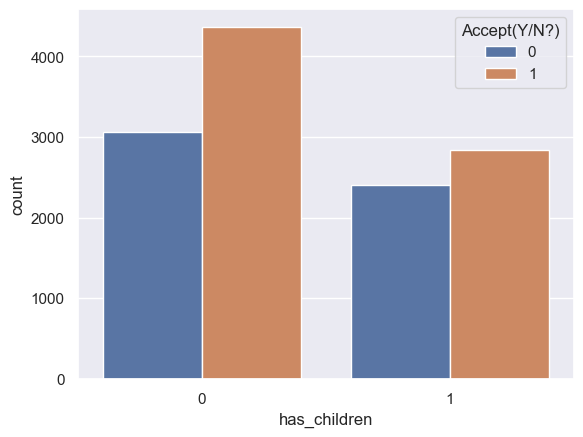

In [64]:
print(data['has_children'].value_counts())
sns.countplot( x = 'has_children' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [65]:
grouping('has_children')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
has_children                                                          
0                     7431      4365      3066   58.740412   41.259588
1                     5253      2845      2408   54.159528   45.840472

We can observe that there is only a little difference in accpetance rate for passengers with children and without children.

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64


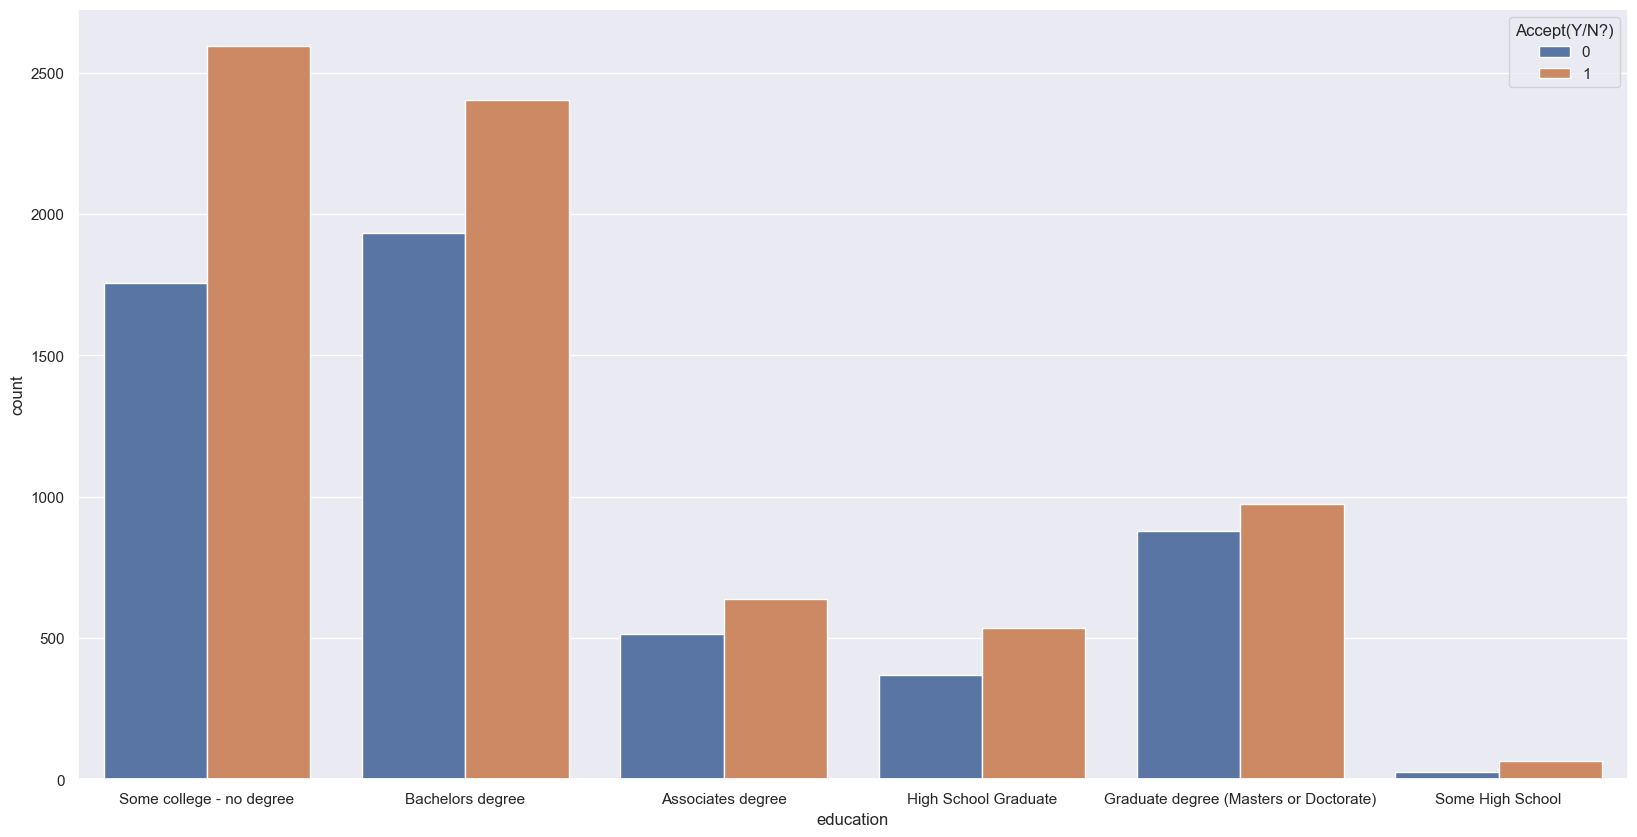

In [66]:
print(data['education'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'education' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [67]:
grouping('education')

Accept(Y/N?)  accepted  rejected  \
education                                                                  
Associates degree                               1153       638       515   
Bachelors degree                                4335      2403      1932   
Graduate degree (Masters or Doctorate)          1852       975       877   
High School Graduate                             905       536       369   
Some High School                                  88        63        25   
Some college - no degree                        4351      2595      1756   

                                        % Accepted  % Rejected  
education                                                       
Associates degree                        55.333912   44.666088  
Bachelors degree                         55.432526   44.567474  
Graduate degree (Masters or Doctorate)   52.645788   47.354212  
High School Graduate                     59.226519   40.773481  
Some High School                         71.590909   28.409091  
Some college - no degree                 59.641462   40.358538

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

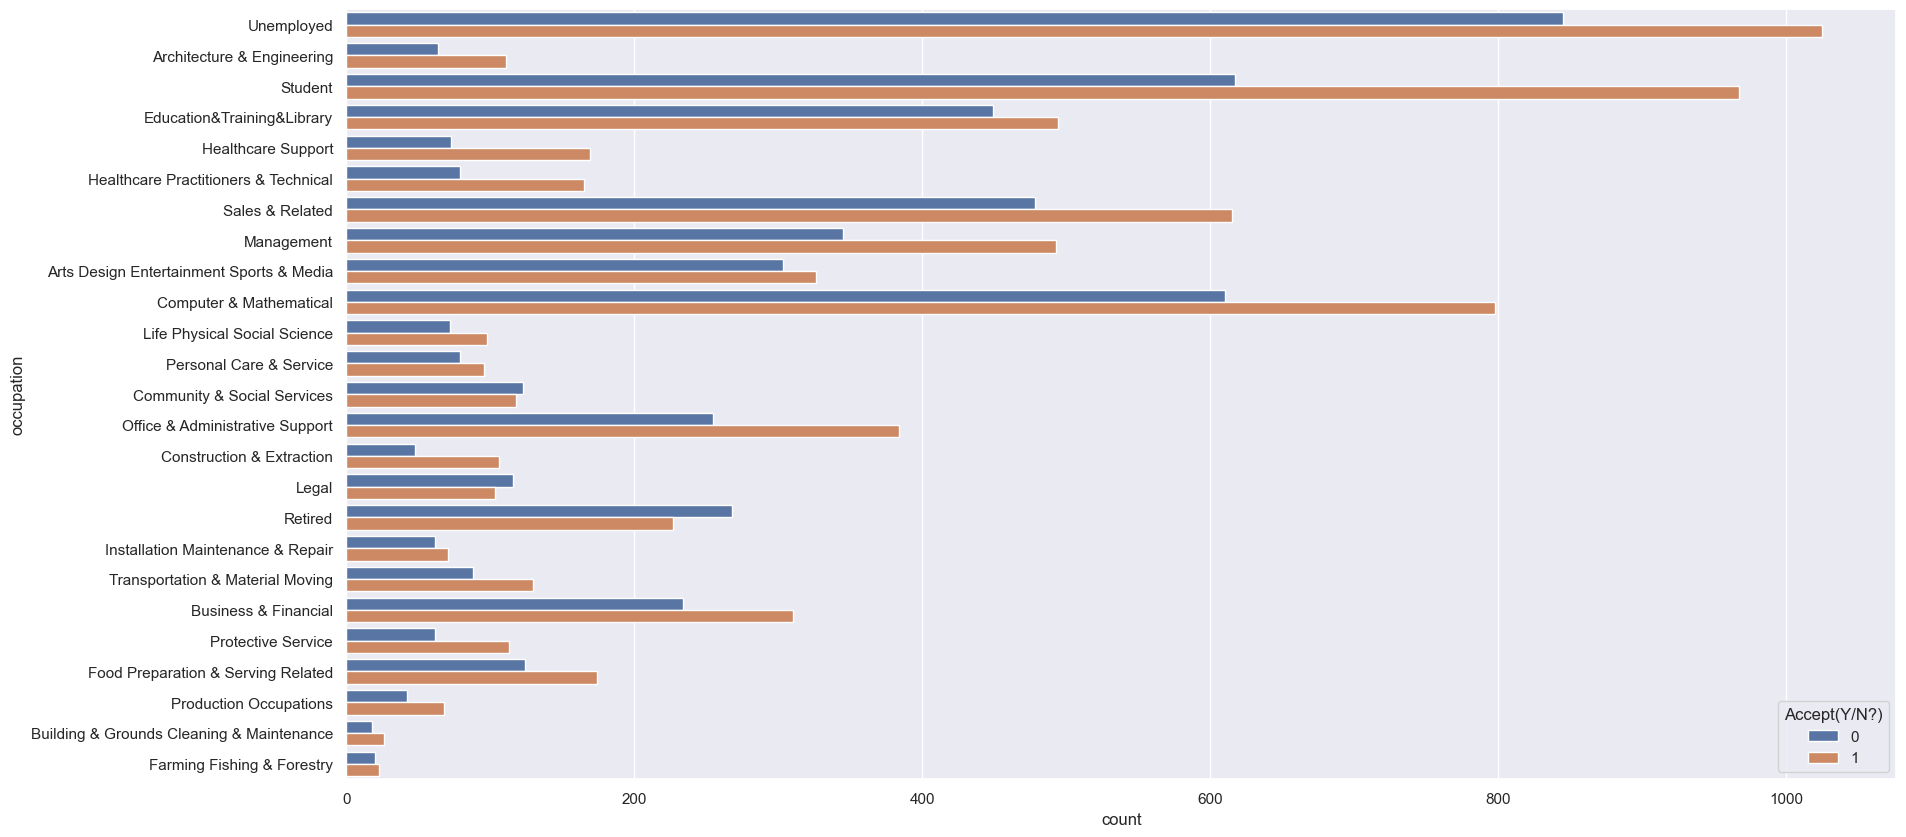

In [68]:
pd.set_option('display.max_rows' , 25)
print(data['occupation'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( y = 'occupation' , data = data , hue = 'Accept(Y/N?)' , orient='h')
plt.show()

In [69]:
grouping('occupation')

Accept(Y/N?)  accepted  rejected  \
occupation                                                                    
Architecture & Engineering                          175       111        64   
Arts Design Entertainment Sports & Media            629       326       303   
Building & Grounds Cleaning & Maintenance            44        26        18   
Business & Financial                                544       310       234   
Community & Social Services                         241       118       123   
Computer & Mathematical                            1408       798       610   
Construction & Extraction                           154       106        48   
Education&Training&Library                          943       494       449   
Farming Fishing & Forestry                           43        23        20   
Food Preparation & Serving Related                  298       174       124   
Healthcare Practitioners & Technical                244       165        79   
Healthcare Support                                  242       169        73   
Installation Maintenance & Repair                   133        71        62   
Legal                                               219       103       116   
Life Physical Social Science                        170        98        72   
Management                                          838       493       345   
Office & Administrative Support                     639       384       255   
Personal Care & Service                             175        96        79   
Production Occupations                              110        68        42   
Protective Service                                  175       113        62   
Retired                                             495       227       268   
Sales & Related                                    1093       615       478   
Student                                            1584       967       617   
Transportation & Material Moving                    218       130        88   
Unemployed                                         1870      1025       845   

                                           % Accepted  % Rejected  
occupation                                                         
Architecture & Engineering                  63.428571   36.571429  
Arts Design Entertainment Sports & Media    51.828299   48.171701  
Building & Grounds Cleaning & Maintenance   59.090909   40.909091  
Business & Financial                        56.985294   43.014706  
Community & Social Services                 48.962656   51.037344  
Computer & Mathematical                     56.676136   43.323864  
Construction & Extraction                   68.831169   31.168831  
Education&Training&Library                  52.386002   47.613998  
Farming Fishing & Forestry                  53.488372   46.511628  
Food Preparation & Serving Related          58.389262   41.610738  
Healthcare Practitioners & Technical        67.622951   32.377049  
Healthcare Support                          69.834711   30.165289  
Installation Maintenance & Repair           53.383459   46.616541  
Legal                                       47.031963   52.968037  
Life Physical Social Science                57.647059   42.352941  
Management                                  58.830549   41.169451  
Office & Administrative Support             60.093897   39.906103  
Personal Care & Service                     54.857143   45.142857  
Production Occupations                      61.818182   38.181818  
Protective Service                          64.571429   35.428571  
Retired                                     45.858586   54.141414  
Sales & Related                             56.267155   43.732845  
Student                                     61.047980   38.952020  
Transportation & Material Moving            59.633028   40.366972  
Unemployed                                  54.812834   45.187166

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64


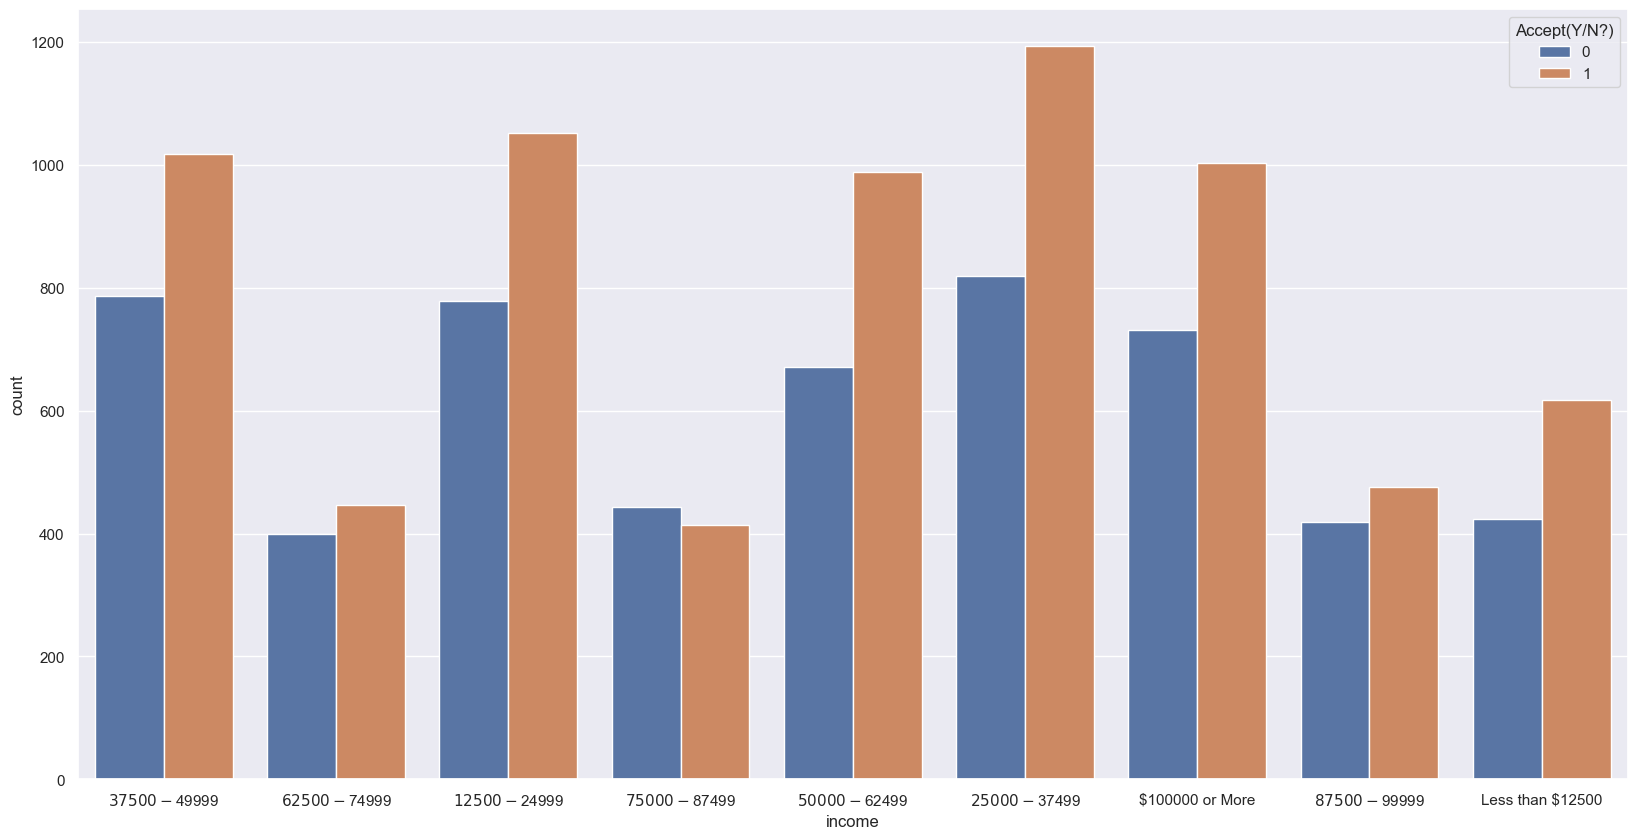

In [70]:
print(data['income'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'income' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [71]:
grouping('income')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
income                                                                    
$100000 or More           1736      1004       732   57.834101   42.165899
$12500 - $24999           1831      1052       779   57.454943   42.545057
$25000 - $37499           2013      1194       819   59.314456   40.685544
$37500 - $49999           1805      1018       787   56.398892   43.601108
$50000 - $62499           1659       988       671   59.553948   40.446052
$62500 - $74999            846       446       400   52.718676   47.281324
$75000 - $87499            857       414       443   48.308051   51.691949
$87500 - $99999            895       476       419   53.184358   46.815642
Less than $12500          1042       618       424   59.309021   40.690979

In [72]:
print(data['Bar'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Bar' , data = data , hue = 'Accept(Y/N?)')
plt.show()

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


In [73]:
grouping('Bar')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
Bar                                                            
1~3            2473      1538       935   62.191670   37.808330
4~8            1076       686       390   63.754647   36.245353
gt8             349       201       148   57.593123   42.406877
less1          3482      1963      1519   56.375646   43.624354
never          5304      2822      2482   53.205128   46.794872

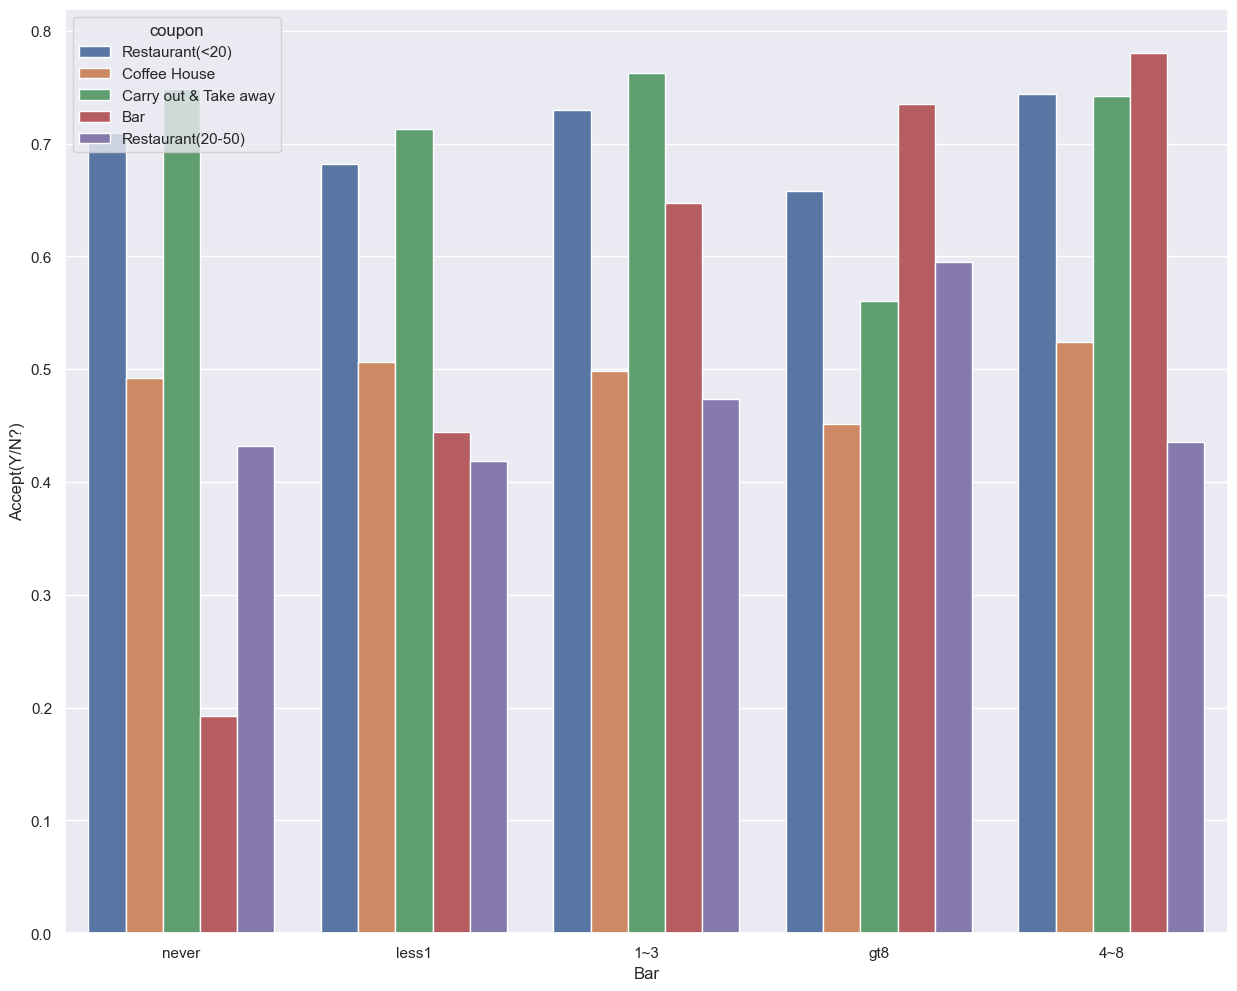

In [74]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'Bar' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , errorbar = None)
plt.show()

CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


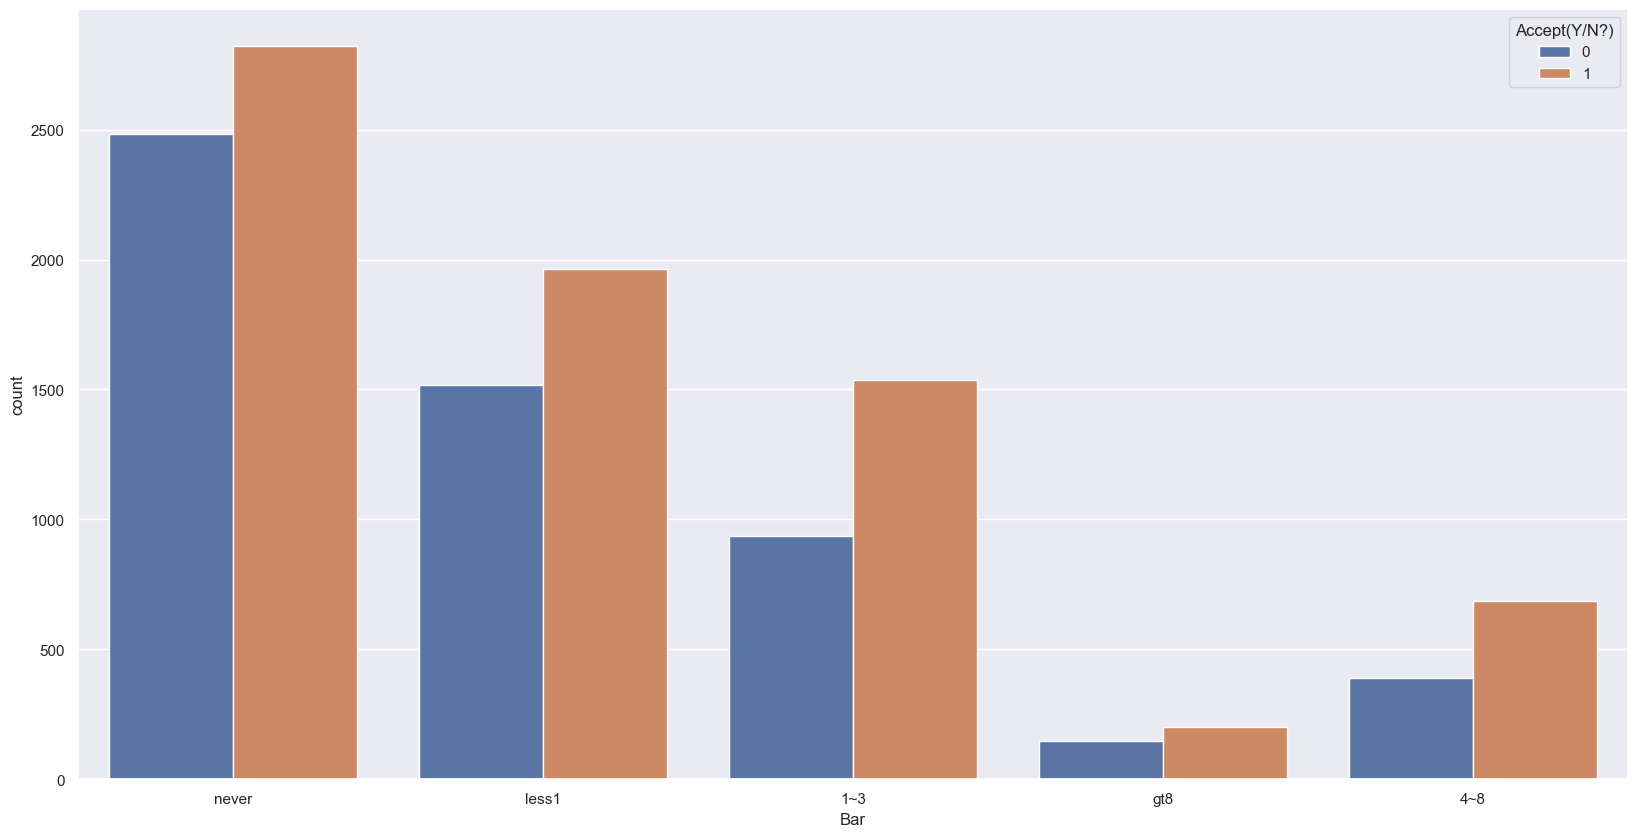

In [75]:
print(data['CoffeeHouse'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Bar' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [76]:
grouping('CoffeeHouse')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
CoffeeHouse                                                          
1~3                  3225      2109      1116   65.395349   34.604651
4~8                  1784      1130       654   63.340807   36.659193
gt8                  1111       648       463   58.325833   41.674167
less1                3602      1961      1641   54.441977   45.558023
never                2962      1362      1600   45.982444   54.017556

In [77]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'CoffeeHouse' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , errorbar = None)
plt.show()

In [78]:
print(data['CarryAway'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'CarryAway' , data = data , hue = 'Accept(Y/N?)')
plt.show()

CarryAway
1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


In [79]:
grouping('CarryAway')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
CarryAway                                                          
1~3                4823      2813      2010   58.324694   41.675306
4~8                4258      2474      1784   58.102395   41.897605
gt8                1594       914       680   57.340025   42.659975
less1              1856       927       929   49.946121   50.053879
never               153        82        71   53.594771   46.405229

In [80]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'CarryAway' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , errorbar = None)
plt.show()

RestaurantLessThan20
1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


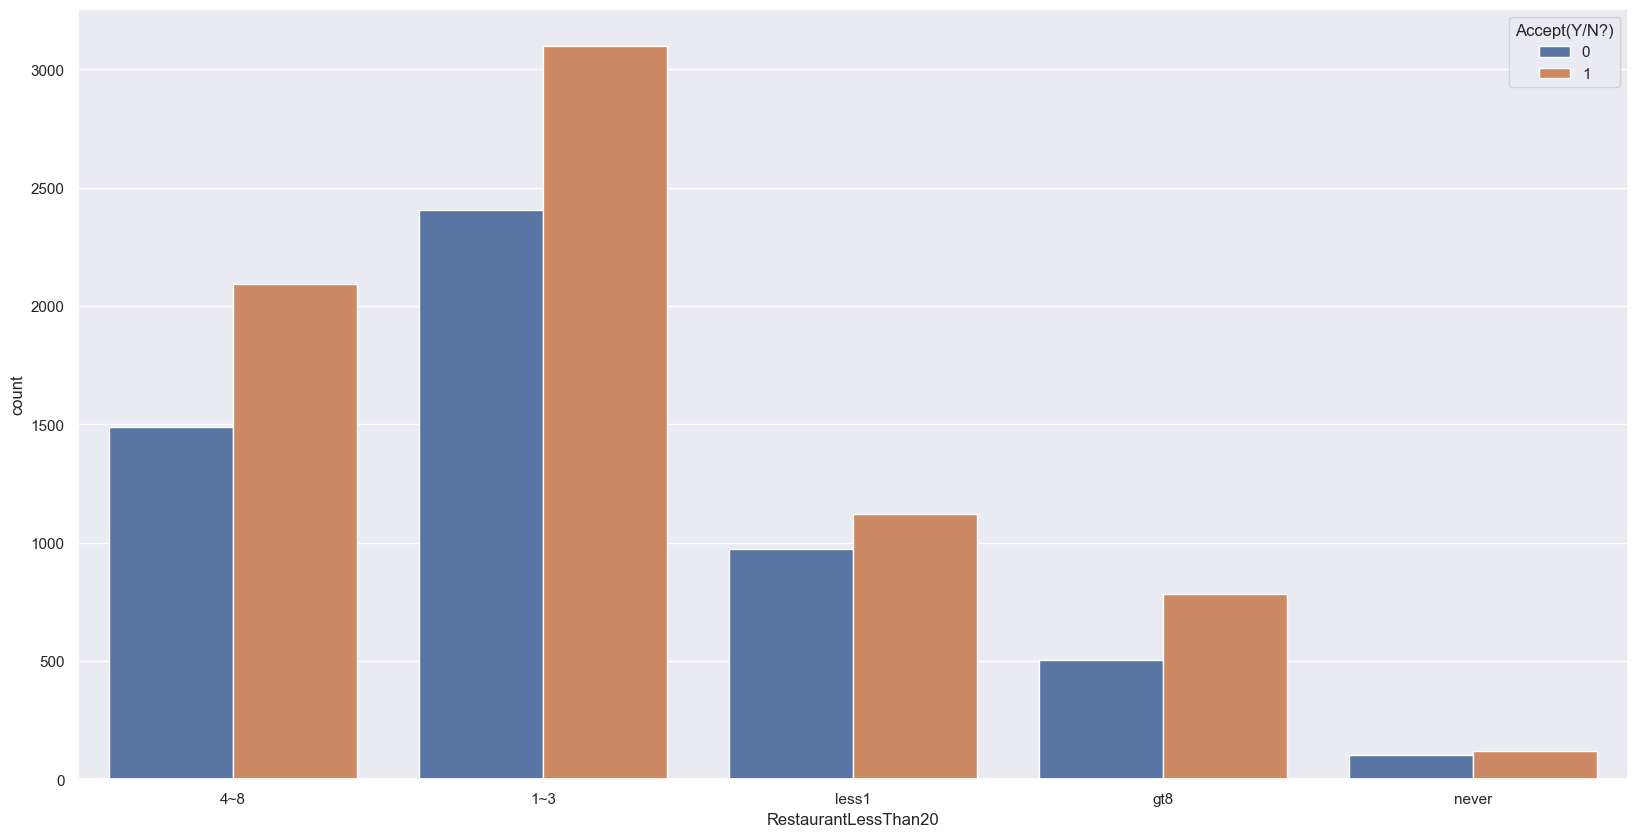

In [81]:
# 'RestaurantLessThan20'
print(data['RestaurantLessThan20'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'RestaurantLessThan20' , data = data , hue = 'Accept(Y/N?)')
plt.show()

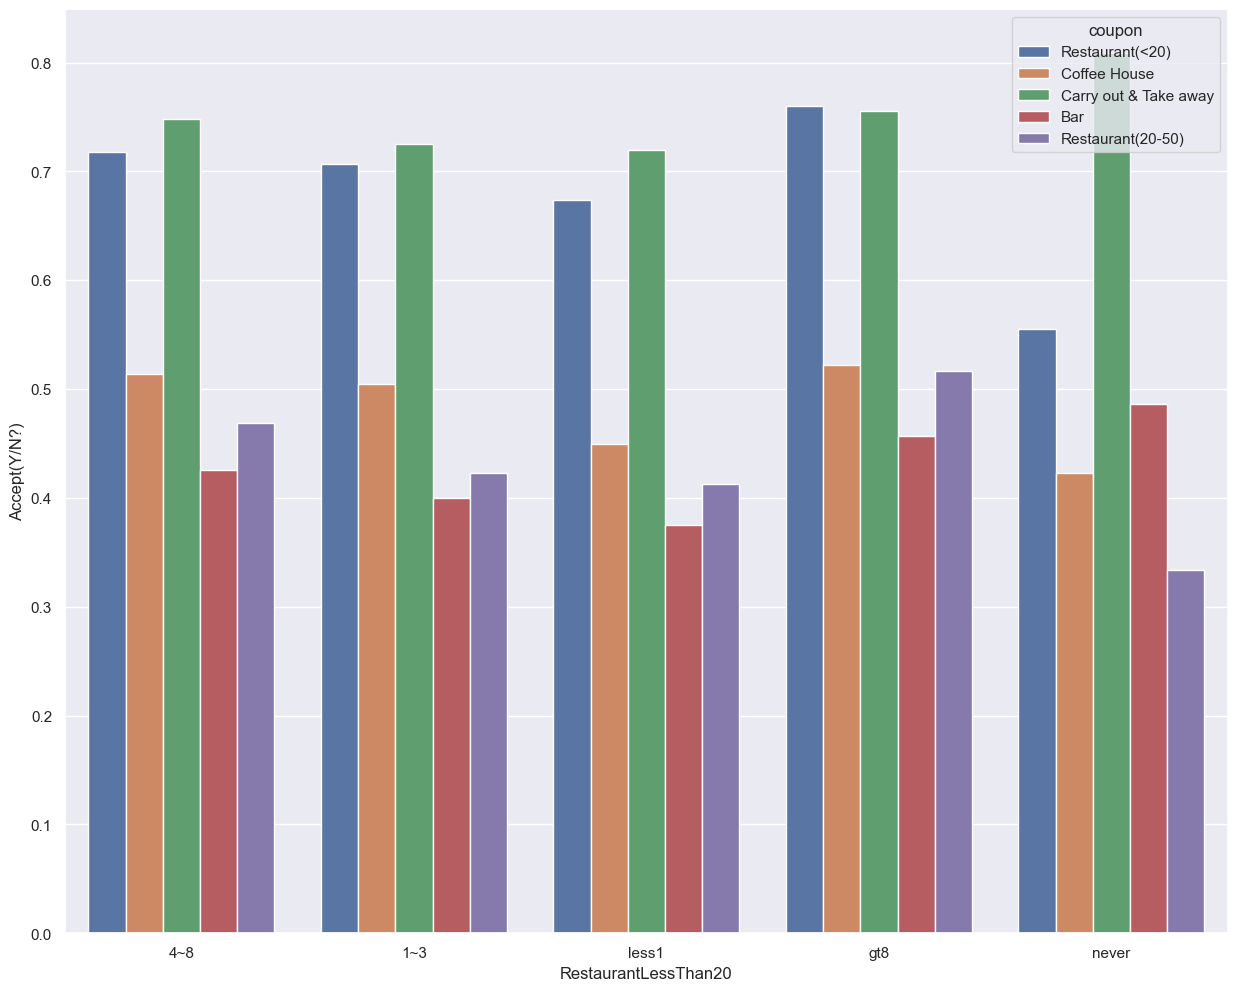

In [82]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'RestaurantLessThan20' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , errorbar = None)
plt.show()

Restaurant20To50
less1    6266
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


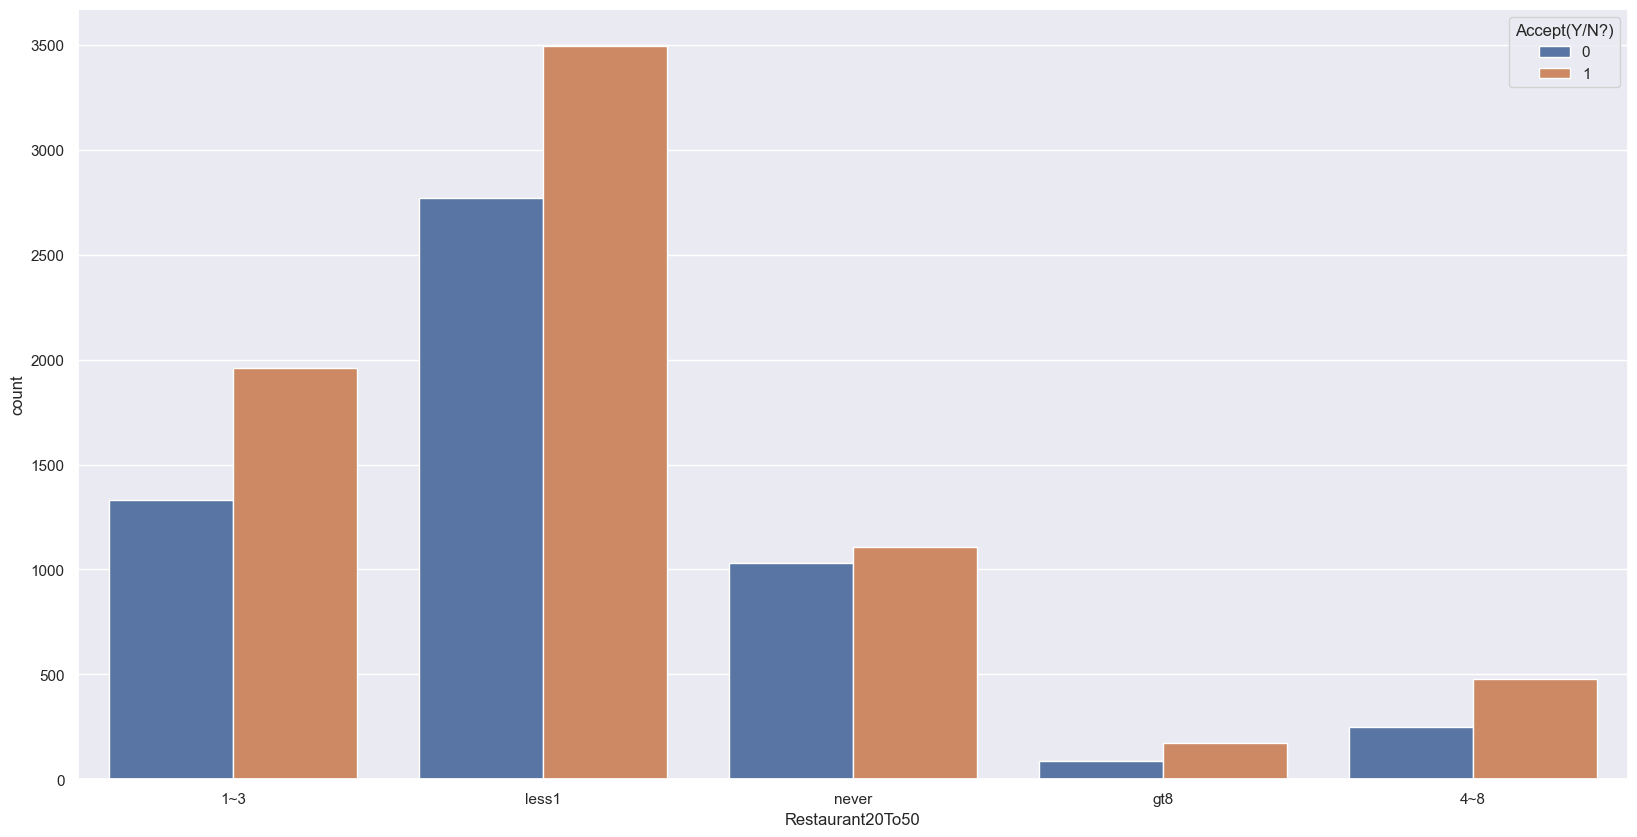

In [83]:
# Restaurant20To50
print(data['Restaurant20To50'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'Restaurant20To50' , data = data , hue = 'Accept(Y/N?)')
plt.show()

In [84]:
grouping('Restaurant20To50')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
Restaurant20To50                                                          
1~3                       3290      1958      1332   59.513678   40.486322
4~8                        728       477       251   65.521978   34.478022
gt8                        264       175        89   66.287879   33.712121
less1                     6266      3495      2771   55.777210   44.222790
never                     2136      1105      1031   51.732210   48.267790

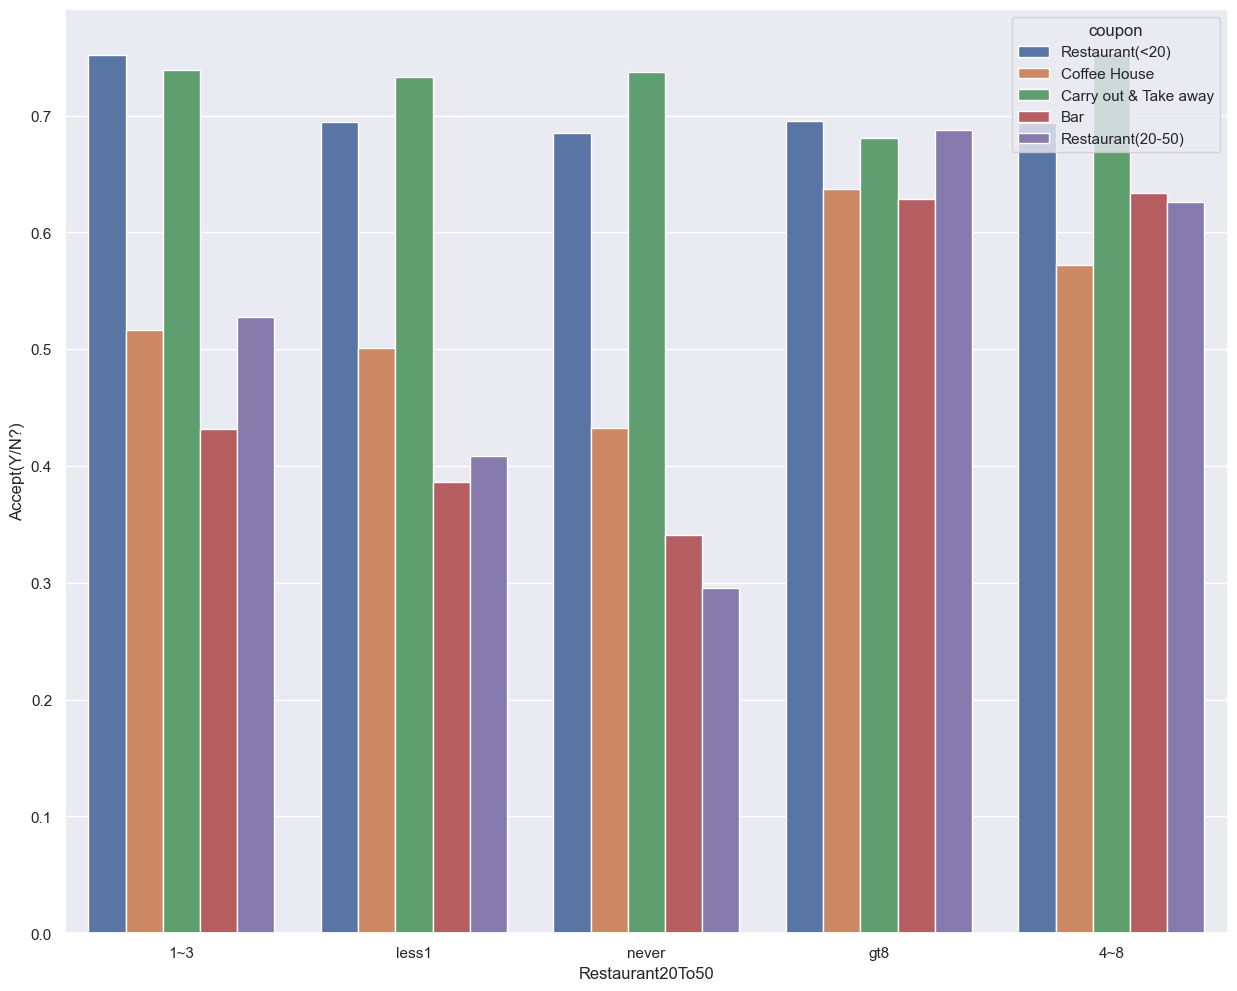

In [85]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'Restaurant20To50' , y = 'Accept(Y/N?)' , data = data , hue = 'coupon' , errorbar = None)
plt.show()

In [86]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [87]:
data['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [88]:
data['toCoupon_GEQ25min'].value_counts()


toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [89]:
# We Since all the data points tell drives are more then 5 Min, We shall categorise driving distance of restaurant / coffee barr
# based on drive time 

In [90]:
data.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CoffeeHouse  \
0         1d  Female  21  Unmarried partner             1  ...       never   
1         2h  Female  21  Unmarried partner             1  ...       never   
2         2h  Female  21  Unmarried partner             1  ...       never   
3         2h  Female  21  Unmarried partner             1  ...       never   
4         1d  Female  21  Unmarried partner             1  ...       never   

  CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
0       1~3                  4~8              1~3                1   
1       1~3                  4~8              1~3                1   
2       1~3                  4~8              1~3                1   
3       1~3                  4~8              1~3                1   
4       1~3                  4~8              1~3                1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same  direction_opp  \
0                 0                 0              0              1   
1                 0                 0              0              1   
2                 1                 0              0              1   
3                 1                 0              0              1   
4                 1                 0              0              1   

   Accept(Y/N?)  
0             1  
1             0  
2             1  
3             0  
4             0  

[5 rows x 24 columns]

In [91]:
data.shape

(12684, 24)

In [92]:
data_1 = data.copy()

In [93]:
data_1.shape

(12684, 24)

In [94]:
drive_time = []
for i in range(data_1.shape[0]) :
    if (data_1['toCoupon_GEQ15min'][i]) == 0 :
        drive_time.append('Less than 15 mins')
    elif ((data_1['toCoupon_GEQ15min'][i]) == 1 ) and ((data_1['toCoupon_GEQ25min'][i]) == 0) :
        drive_time.append('15 to 25 mins')
    else :
        drive_time.append('More than 25 mins')

In [95]:
data_1['drive_time'] = drive_time

In [96]:
data_1.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CarryAway  \
0         1d  Female  21  Unmarried partner             1  ...       1~3   
1         2h  Female  21  Unmarried partner             1  ...       1~3   
2         2h  Female  21  Unmarried partner             1  ...       1~3   
3         2h  Female  21  Unmarried partner             1  ...       1~3   
4         1d  Female  21  Unmarried partner             1  ...       1~3   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                  4~8              1~3                1                 0   
1                  4~8              1~3                1                 0   
2                  4~8              1~3                1                 1   
3                  4~8              1~3                1                 1   
4                  4~8              1~3                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Accept(Y/N?)  \
0                 0              0             1             1   
1                 0              0             1             0   
2                 0              0             1             1   
3                 0              0             1             0   
4                 0              0             1             0   

          drive_time  
0  Less than 15 mins  
1  Less than 15 mins  
2      15 to 25 mins  
3      15 to 25 mins  
4      15 to 25 mins  

[5 rows x 25 columns]

drive_time
15 to 25 mins        5611
Less than 15 mins    5562
More than 25 mins    1511
Name: count, dtype: int64


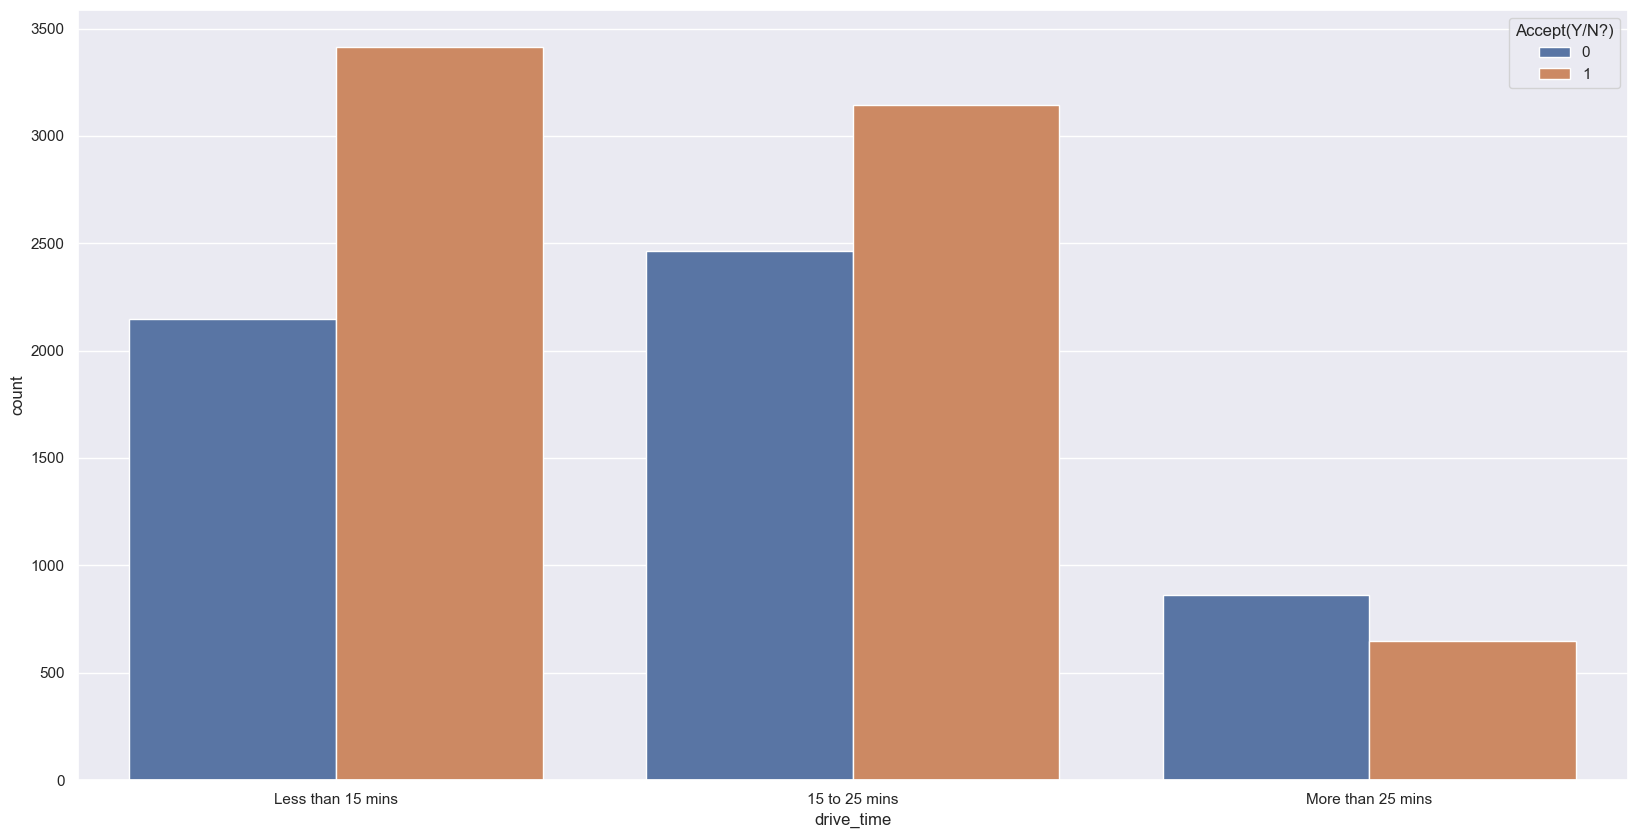

In [97]:
print(data_1['drive_time'].value_counts())
plt.figure(figsize = (20,10))
sns.countplot( x = 'drive_time' , data = data_1 , hue = 'Accept(Y/N?)')
plt.show()

In [98]:
b = pd.DataFrame(data_1.groupby('drive_time')['Accept(Y/N?)'].count())
b['accepted'] = data_1[data_1['Accept(Y/N?)'] == 1].groupby('drive_time')['Accept(Y/N?)'].count()
b['rejected'] = data_1[data_1['Accept(Y/N?)'] == 0].groupby('drive_time')['Accept(Y/N?)'].count()
b['% Accepted'] = ((b['accepted']) / (b['Accept(Y/N?)']))*100
b['% Rejected'] = ((b['rejected']) / (b['Accept(Y/N?)']))*100
b

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
drive_time                                                                 
15 to 25 mins              5611      3146      2465   56.068437   43.931563
Less than 15 mins          5562      3416      2146   61.416757   38.583243
More than 25 mins          1511       648       863   42.885506   57.114494

In [99]:
plt.figure(figsize = (15,12))
sns.barplot(x = 'drive_time' , y = 'Accept(Y/N?)' , data = data_1 , hue = 'coupon' , errorbar = None)
plt.show()

In [100]:
data_1.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ... CarryAway  \
0         1d  Female  21  Unmarried partner             1  ...       1~3   
1         2h  Female  21  Unmarried partner             1  ...       1~3   
2         2h  Female  21  Unmarried partner             1  ...       1~3   
3         2h  Female  21  Unmarried partner             1  ...       1~3   
4         1d  Female  21  Unmarried partner             1  ...       1~3   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                  4~8              1~3                1                 0   
1                  4~8              1~3                1                 0   
2                  4~8              1~3                1                 1   
3                  4~8              1~3                1                 1   
4                  4~8              1~3                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Accept(Y/N?)  \
0                 0              0             1             1   
1                 0              0             1             0   
2                 0              0             1             1   
3                 0              0             1             0   
4                 0              0             1             0   

          drive_time  
0  Less than 15 mins  
1  Less than 15 mins  
2      15 to 25 mins  
3      15 to 25 mins  
4      15 to 25 mins  

[5 rows x 25 columns]

In [101]:
# Now we can drop toCoupon_GEQ5min , toCoupon_GEQ15min , toCoupon_GEQ25min since we have created a new variable drive_time
data_1.shape

(12684, 25)

In [102]:
data_1 = data_1.drop(['toCoupon_GEQ5min' , 'toCoupon_GEQ15min' , 'toCoupon_GEQ25min'] , axis = 1)
data_1.shape

(12684, 22)

In [103]:
data_1.rename(columns = {'Accept(Y/N?)'  : 'Accept'} , inplace = True)
data_1.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  ...  \
0         1d  Female  21  Unmarried partner             1  ...   
1         2h  Female  21  Unmarried partner             1  ...   
2         2h  Female  21  Unmarried partner             1  ...   
3         2h  Female  21  Unmarried partner             1  ...   
4         1d  Female  21  Unmarried partner             1  ...   

            income    Bar CoffeeHouse CarryAway RestaurantLessThan20  \
0  $37500 - $49999  never       never       1~3                  4~8   
1  $37500 - $49999  never       never       1~3                  4~8   
2  $37500 - $49999  never       never       1~3                  4~8   
3  $37500 - $49999  never       never       1~3                  4~8   
4  $37500 - $49999  never       never       1~3                  4~8   

  Restaurant20To50 direction_same direction_opp  Accept         drive_time  
0              1~3              0             1       1  Less than 15 mins  
1              1~3              0             1       0  Less than 15 mins  
2              1~3              0             1       1      15 to 25 mins  
3              1~3              0             1       0      15 to 25 mins  
4              1~3              0             1       0      15 to 25 mins  

[5 rows x 22 columns]

In [104]:
# Checking significance for Feature Occupation through Anova test


import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Accept ~ occupation' , data = data_1).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

                 sum_sq       df         F        PR(>F)
occupation    29.411863     24.0  5.033285  8.472695e-15
Residual    3082.188579  12659.0       NaN           NaN


In [105]:
data_1.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
direction_same           int64
direction_opp            int64
Accept                   int64
drive_time              object
dtype: object

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
cat_col = ['destination','passanger','weather','coupon','expiration','gender','age','maritalStatus','education','occupation','occupation','income','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','drive_time']

for col in cat_col:
    le = LabelEncoder()
    data_1[col] = le.fit_transform(data_1[col])

In [108]:
plt.figure(figsize = (12,15))
corr = data_1.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

In [109]:
corr

destination  passanger   weather  temperature    coupon  \
destination              1.000000  -0.117811 -0.078305    -0.027633 -0.011468   
passanger               -0.117811   1.000000  0.059821     0.056127  0.018767   
weather                 -0.078305   0.059821  1.000000     0.434497  0.147008   
temperature             -0.027633   0.056127  0.434497     1.000000  0.128771   
coupon                  -0.011468   0.018767  0.147008     0.128771  1.000000   
expiration              -0.032594   0.074764  0.017702     0.124090  0.148383   
gender                   0.006779  -0.020896 -0.027003    -0.025504  0.007134   
age                     -0.002112   0.004969 -0.019725    -0.027556  0.002314   
maritalStatus            0.003036  -0.021376 -0.016816     0.003585 -0.000132   
has_children            -0.006707   0.034542  0.012657    -0.019716 -0.010422   
education                0.008793   0.000934  0.012733     0.015460 -0.000724   
occupation              -0.007463  -0.060400 -0.006855     0.006536 -0.002216   
income                  -0.014554  -0.002329 -0.032758    -0.025091  0.000871   
Bar                     -0.005048   0.015055  0.010426     0.009142 -0.007581   
CoffeeHouse             -0.007185  -0.008619 -0.006018     0.007491 -0.002124   
CarryAway               -0.007676  -0.017223 -0.038593    -0.032657 -0.003012   
RestaurantLessThan20     0.003497  -0.030378 -0.005306    -0.001289  0.010651   
Restaurant20To50        -0.000255  -0.030401  0.005795     0.001833  0.005592   
direction_same          -0.083328  -0.268830  0.017712     0.097085 -0.073007   
direction_opp            0.083328   0.268830 -0.017712    -0.097085  0.073007   
Accept                  -0.001906   0.051614  0.098800     0.061240  0.097019   
drive_time               0.085764  -0.236743 -0.104810    -0.093235 -0.011510   

                      expiration    gender       age  maritalStatus  \
destination            -0.032594  0.006779 -0.002112       0.003036   
passanger               0.074764 -0.020896  0.004969      -0.021376   
weather                 0.017702 -0.027003 -0.019725      -0.016816   
temperature             0.124090 -0.025504 -0.027556       0.003585   
coupon                  0.148383  0.007134  0.002314      -0.000132   
expiration              1.000000 -0.001264  0.006523      -0.012328   
gender                 -0.001264  1.000000 -0.060720       0.057552   
age                     0.006523 -0.060720  1.000000      -0.177495   
maritalStatus          -0.012328  0.057552 -0.177495       1.000000   
has_children            0.016020 -0.159956  0.306306      -0.433628   
education              -0.009198  0.015029  0.086833       0.068872   
occupation             -0.018288 -0.014758 -0.016434       0.142972   
income                 -0.011180  0.026677  0.048782       0.073555   
Bar                    -0.008656 -0.154986  0.206363      -0.091539   
CoffeeHouse            -0.012669  0.059404 -0.000636       0.011661   
CarryAway              -0.003832 -0.017530  0.088903      -0.024881   
RestaurantLessThan20   -0.010471  0.044519 -0.028640      -0.001253   
Restaurant20To50       -0.000457 -0.000209 -0.001232       0.044802   
direction_same          0.033584 -0.004496 -0.008279       0.016504   
direction_opp          -0.033584  0.004496  0.008279      -0.016504   
Accept                 -0.129920  0.043969 -0.035241       0.025083   
drive_time             -0.062975  0.007787 -0.019563       0.041101   

                      has_children  ...    income       Bar  CoffeeHouse  \
destination              -0.006707  ... -0.014554 -0.005048    -0.007185   
passanger                 0.034542  ... -0.002329  0.015055    -0.008619   
weather                   0.012657  ... -0.032758  0.010426    -0.006018   
temperature              -0.019716  ... -0.025091  0.009142     0.007491   
coupon                   -0.010422  ...  0.000871 -0.007581    -0.002124   
expiration                0.016020  ... -0.011180 -0.008656    -0.01

In [110]:
sns.pairplot(data = data_1 , hue = 'Accept')
plt.show()

In [111]:
grouping('has_children')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
has_children                                                          
0                     7431      4365      3066   58.740412   41.259588
1                     5253      2845      2408   54.159528   45.840472

In [112]:
grouping('direction_same')

Accept(Y/N?)  accepted  rejected  % Accepted  % Rejected
direction_same                                                          
0                       9960      5624      4336   56.465863   43.534137
1                       2724      1586      1138   58.223201   41.776799

In [113]:
data_2 = data_1.copy()

In [114]:
data_2.head()

destination  passanger  weather  temperature  coupon  expiration  gender  \
0            1          0        2           55       4           0       0   
1            1          1        2           80       2           1       0   
2            1          1        2           80       1           1       0   
3            1          1        2           80       2           1       0   
4            1          1        2           80       2           0       0   

   age  maritalStatus  has_children  ...  income  Bar  CoffeeHouse  CarryAway  \
0    0              3             1  ...       3    4            4          0   
1    0              3             1  ...       3    4            4          0   
2    0              3             1  ...       3    4            4          0   
3    0              3             1  ...       3    4            4          0   
4    0              3             1  ...       3    4            4          0   

   RestaurantLessThan20  Restaurant20To50  direction_same  direction_opp  \
0                     1                 0               0              1   
1                     1                 0               0              1   
2                     1                 0               0              1   
3                     1                 0               0              1   
4                     1                 0               0              1   

   Accept  drive_time  
0       1           1  
1       0           1  
2       1           0  
3       0           0  
4       0           0  

[5 rows x 22 columns]

In [115]:
data_2 = data_2.drop(['has_children' ,'direction_same' , 'direction_opp'] , axis =1)
data_2.shape

(12684, 19)

In [116]:
data_2['occupation'].value_counts()

occupation
24    1870
22    1584
5     1408
21    1093
7      943
15     838
16     639
1      629
3      544
20     495
9      298
10     244
11     242
4      241
13     219
23     218
0      175
17     175
19     175
14     170
6      154
12     133
18     110
2       44
8       43
Name: count, dtype: int64

In [117]:
for i in data_1.select_dtypes(include = 'object').columns:
    print(i)

In [118]:
print(i)

12683


In [119]:
data_2

destination  passanger  weather  temperature  coupon  expiration  \
0                1          0        2           55       4           0   
1                1          1        2           80       2           1   
2                1          1        2           80       1           1   
3                1          1        2           80       2           1   
4                1          1        2           80       2           0   
...            ...        ...      ...          ...     ...         ...   
12679            0          3        0           55       1           0   
12680            2          0        0           55       1           0   
12681            2          0        1           30       2           0   
12682            2          0        1           30       0           0   
12683            2          0        2           80       3           1   

       gender  age  maritalStatus  education  occupation  income  Bar  \
0           0    0              3          5          24       3    4   
1           0    0              3          5          24       3    4   
2           0    0              3          5          24       3    4   
3           0    0              3          5          24       3    4   
4           0    0              3          5          24       3    4   
...       ...  ...            ...        ...         ...     ...  ...   
12679       1    1              2          1          21       6    4   
12680       1    1              2          1          21       6    4   
12681       1    1              2          1          21       6    4   
12682       1    1              2          1          21       6    4   
12683       1    1              2          1          21       6    4   

       CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50  Accept  \
0                4          0                     1                 0       1   
1                4          0                     1                 0       0   
2                4          0                     1                 0       1   
3                4          0                     1                 0       0   
4                4          0                     1                 0       0   
...            ...        ...                   ...               ...     ...   
12679            4          0                     1                 0       1   
12680            4          0                     1                 0       1   
12681            4          0                     1                 0       0   
12682            4          0                     1                 0       0   
12683            4          0                     1                 0       0   

       drive_time  
0               1  
1               1  
2               0  
3               0  
4               0  
...           ...  
12679           1  
12680           1  
12681           1  
12682           2  
12683           1  

[12684 rows x 19 columns]

In [120]:
data_2.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'education',
       'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'Accept', 'drive_time'],
      dtype='object')

In [121]:
data_2.dtypes

destination             int64
passanger               int64
weather                 int64
temperature             int64
coupon                  int64
expiration              int64
gender                  int64
age                     int64
maritalStatus           int64
education               int64
occupation              int64
income                  int64
Bar                     int64
CoffeeHouse             int64
CarryAway               int64
RestaurantLessThan20    int64
Restaurant20To50        int64
Accept                  int64
drive_time              int64
dtype: object

In [126]:
data_2 = pd.get_dummies(data_2 , columns = ['destination' ,'passanger', 'weather','coupon','expiration','gender',
                                            'age','maritalStatus','education','occupation','income','Bar',
                                            'CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','drive_time'])
data_2.shape

(12684, 102)

In [122]:
print([col for col in data_2.columns if 'destination' in col])  
print([col for col in data_2.columns if 'passanger' in col])  
print([col for col in data_2.columns if 'drive_time' in col])  

['destination']
['passanger']
['drive_time']


In [127]:
# Dummy Variables 

data_2.columns.tolist()

['temperature',
 'Accept',
 'destination_0',
 'destination_1',
 'destination_2',
 'passanger_0',
 'passanger_1',
 'passanger_2',
 'passanger_3',
 'weather_0',
 'weather_1',
 'weather_2',
 'coupon_0',
 'coupon_1',
 'coupon_2',
 'coupon_3',
 'coupon_4',
 'expiration_0',
 'expiration_1',
 'gender_0',
 'gender_1',
 'age_0',
 'age_1',
 'age_2',
 'age_3',
 'age_4',
 'age_5',
 'age_6',
 'age_7',
 'maritalStatus_0',
 'maritalStatus_1',
 'maritalStatus_2',
 'maritalStatus_3',
 'maritalStatus_4',
 'education_0',
 'education_1',
 'education_2',
 'education_3',
 'education_4',
 'education_5',
 'occupation_0',
 'occupation_1',
 'occupation_2',
 'occupation_3',
 'occupation_4',
 'occupation_5',
 'occupation_6',
 'occupation_7',
 'occupation_8',
 'occupation_9',
 'occupation_10',
 'occupation_11',
 'occupation_12',
 'occupation_13',
 'occupation_14',
 'occupation_15',
 'occupation_16',
 'occupation_17',
 'occupation_18',
 'occupation_19',
 'occupation_20',
 'occupation_21',
 'occupation_22',
 'occupa

In [128]:
data_2.shape

(12684, 102)

In [129]:
data_2 = data_2.drop(['destination_2','passanger_3','weather_2','coupon_4','expiration_0','age_7','gender_0',
'maritalStatus_4', 'education_5','occupation_24','income_8','Bar_4',
'CoffeeHouse_4','CarryAway_4','RestaurantLessThan20_4','Restaurant20To50_4','drive_time_2'],axis =1)

data_2.shape

(12684, 85)

In [130]:
# SPLITTING INTO X AND Y 

x = data_2.drop(['Accept'] , axis = 1)
y = data_2[['Accept']]

In [131]:
x.head()

temperature  destination_0  destination_1  passanger_0  passanger_1  \
0           55          False           True         True        False   
1           80          False           True        False         True   
2           80          False           True        False         True   
3           80          False           True        False         True   
4           80          False           True        False         True   

   passanger_2  weather_0  weather_1  coupon_0  coupon_1  ...  \
0        False      False      False     False     False  ...   
1        False      False      False     False     False  ...   
2        False      False      False     False      True  ...   
3        False      False      False     False     False  ...   
4        False      False      False     False     False  ...   

   RestaurantLessThan20_0  RestaurantLessThan20_1  RestaurantLessThan20_2  \
0                   False                    True                   False   
1                   False                    True                   False   
2                   False                    True                   False   
3                   False                    True                   False   
4                   False                    True                   False   

   RestaurantLessThan20_3  Restaurant20To50_0  Restaurant20To50_1  \
0                   False                True               False   
1                   False                True               False   
2                   False                True               False   
3                   False                True               False   
4                   False                True               False   

   Restaurant20To50_2  Restaurant20To50_3  drive_time_0  drive_time_1  
0               False               False         False          True  
1               False               False         False          True  
2               False               False          True         False  
3               False               False          True         False  
4               False               False          True         False  

[5 rows x 84 columns]

In [132]:
y.head()

Accept
0       1
1       0
2       1
3       0
4       0

## Feature Scaling

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.43342979, -0.58536182,  1.00934674, ..., -0.98808735,
        -0.89067304,  1.1315806 ],
       [ 0.87179896, -0.58536182,  1.00934674, ..., -0.98808735,
        -0.89067304,  1.1315806 ],
       [ 0.87179896, -0.58536182,  1.00934674, ..., -0.98808735,
         1.12274646, -0.88371964],
       ...,
       [-1.73865855, -0.58536182, -0.99073981, ..., -0.98808735,
        -0.89067304,  1.1315806 ],
       [-1.73865855, -0.58536182, -0.99073981, ..., -0.98808735,
        -0.89067304, -0.88371964],
       [ 0.87179896, -0.58536182, -0.99073981, ..., -0.98808735,
        -0.89067304,  1.1315806 ]], shape=(12684, 84))

## Train test Split

In [134]:
# Passing scaled data for logistic regression

In [135]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(sc_x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(9513, 84) (3171, 84) (9513, 1) (3171, 1)


In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
logr = LogisticRegression()

In [138]:
logit = logr.fit(x_train , y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
y_pred_test_lr = logit.predict(x_test)
y_pred_train_lr = logit.predict(x_train)

In [140]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix 

In [141]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_lr))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_lr))

Training_accuracy : 0.689162199095974
**********************
Testing_accuracy : 0.6710816777041942


In [142]:
# Passing unscaled data 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(9513, 84) (3171, 84) (9513, 1) (3171, 1)


In [143]:
logit = logr.fit(x_train , y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
y_pred_test_unscaled = logit.predict(x_test)
y_pred_train_unscaled = logit.predict(x_train)

In [145]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_unscaled))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_unscaled))

Training_accuracy : 0.6912645853043204
**********************
Testing_accuracy : 0.6723431094292022


#### DECISION TREE

In [146]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 101 )
print( x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(9513, 84) (3171, 84) (9513, 1) (3171, 1)


In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train,y_train)

In [149]:
y_pred_test_dtree = dt.predict(x_test)
y_pred_train_dtree = dt.predict(x_train)

In [150]:
print('Training_accuracy :' , accuracy_score(y_train , y_pred_train_dtree))
print('**********************')
print('Testing_accuracy :' , accuracy_score(y_test , y_pred_test_dtree))

Training_accuracy : 0.9915904551666141
**********************
Testing_accuracy : 0.673919899085462


In [151]:
y.value_counts()/len(y)*100

Accept
1         56.843267
0         43.156733
Name: count, dtype: float64

In [152]:
dt.feature_importances_

array([0.03883429, 0.01954327, 0.03096719, 0.01462882, 0.01186523,
       0.01415724, 0.00884445, 0.00906673, 0.02757737, 0.03030904,
       0.01789186, 0.01826265, 0.03919554, 0.02275997, 0.01353294,
       0.01779995, 0.01262054, 0.01044565, 0.00675726, 0.00634167,
       0.01231805, 0.00680258, 0.01246447, 0.01348865, 0.00810898,
       0.01096331, 0.01719128, 0.00903072, 0.00780319, 0.00149961,
       0.00541148, 0.00645323, 0.00023209, 0.00623228, 0.00527313,
       0.01046422, 0.00201836, 0.00717019, 0.00093485, 0.00488879,
       0.00674597, 0.00358389, 0.00178498, 0.00509205, 0.00581865,
       0.00832237, 0.00904296, 0.00276766, 0.00119507, 0.00131862,
       0.0052075 , 0.01332174, 0.01585579, 0.00229254, 0.00824275,
       0.00971501, 0.0116257 , 0.01136658, 0.01661076, 0.00953388,
       0.00845984, 0.01198889, 0.0149504 , 0.01572383, 0.00537072,
       0.01395305, 0.02413204, 0.01854619, 0.01842819, 0.01797545,
       0.01447206, 0.012706  , 0.00804352, 0.01192743, 0.01269

In [153]:
pd.set_option('display.max_rows' , 50)
pd.DataFrame(index = x.columns , data = dt.feature_importances_ , columns = ['Feature Importance'])

Feature Importance
temperature                   0.038834
destination_0                 0.019543
destination_1                 0.030967
passanger_0                   0.014629
passanger_1                   0.011865
...                                ...
Restaurant20To50_1            0.009289
Restaurant20To50_2            0.006006
Restaurant20To50_3            0.015502
drive_time_0                  0.021308
drive_time_1                  0.029109

[84 rows x 1 columns]

In [154]:
print(classification_report(y_test , y_pred_test_dtree))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1335
           1       0.72      0.71      0.72      1836

    accuracy                           0.67      3171
   macro avg       0.67      0.67      0.67      3171
weighted avg       0.67      0.67      0.67      3171



#### RANDOM FOREST

In [155]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
rf = RF.fit(x_train , y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [156]:
y_pred_test_rf = rf.predict(x_test)
y_pred_train_rf = rf.predict(x_train)

In [157]:
print('Training_accuracy_rf :' , accuracy_score(y_train , y_pred_train_rf))
print('**********************')
print('Testing_accuracy_rf :' , accuracy_score(y_test , y_pred_test_rf))

Training_accuracy_rf : 0.9915904551666141
**********************
Testing_accuracy_rf : 0.7436140018921475


#### SUPPORT VECTOR MACHINE

In [158]:
from sklearn.svm import SVC

In [159]:
svc = SVC()
svm = svc.fit(x_train,y_train)
y_pred_train_svm = svc.predict(x_train)
y_pred_test_svm = svc.predict(x_test)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_svm))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_svm))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accu SVM: 0.5649111741826973
testing accu SVM : 0.5789971617786187


#### K-NEAREST NEIGHBOUR

In [160]:
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn = KNeighborsClassifier()
kn = knn.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [162]:
y_pred_train_knn = kn.predict(x_train.values)
y_pred_test_knn = kn.predict(x_test.values)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [163]:
print('training accu knn:' , accuracy_score(y_train , y_pred_train_knn))
print('testing accu knn:' , accuracy_score(y_test , y_pred_test_knn))

training accu knn: 0.7754651529485966
testing accu knn: 0.6499526963103122


#### GRADIENT BOOSTING CLASSIFIER

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)
y_pred_test_gd = gdb.predict(x_test)
y_pred_train_gd = gdb.predict(x_train)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_gd))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accu SVM: 0.7304740880899822
testing accu SVM : 0.7142857142857143


#### XG BOOSTING CLASSIFIER

In [166]:
from xgboost import XGBClassifier

In [167]:
xgb = XGBClassifier()
xg = xgb.fit(x_train,y_train)
y_pred_test_xgb = xg.predict(x_test)
y_pred_train_xgb = xg.predict(x_train)
print('training accu SVM:' , accuracy_score(y_train , y_pred_train_xgb))
print('testing accu SVM :' , accuracy_score(y_test , y_pred_test_xgb))

training accu SVM: 0.8919373488909913
testing accu SVM : 0.7615894039735099


#### NAIVE BAYES CLASSIFIER

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [169]:
# Gaussian 

naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train,y_train)
y_pred_test_ngb = ngb.predict(x_test)
y_pred_train_ngb = ngb.predict(x_train)
print('training accu NGB:' , accuracy_score(y_train , y_pred_train_ngb))
print('testing accu NGB :' , accuracy_score(y_test , y_pred_test_ngb))

training accu NGB: 0.6152633238725954
testing accu NGB : 0.5998107852412489


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
# Bernoulli 

naive_br = BernoulliNB()
nbr = naive_br.fit(x_train,y_train)
y_pred_test_nbr = nbr.predict(x_test)
y_pred_train_nbr = nbr.predict(x_train)
print('training accu NBR:' , accuracy_score(y_train , y_pred_train_nbr))
print('testing accu NBR :' , accuracy_score(y_test , y_pred_test_nbr))

training accu NBR: 0.6633028487333124
testing accu NBR : 0.6436455376852728


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
# GRADIENT BOOSTING yielded better result 

print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7304740880899822
testing accu GBM : 0.7142857142857143


#### HYPER PARAMETER TUNING USING GRID SEARCH CV

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid = {'n_estimators' : [50,100,200] ,
              'learning_rate' : [0.05 ,0.1 , 0.2 ],
              'max_depth'  : [3,5,7] }

In [174]:
gbm_model = GradientBoostingClassifier()

In [175]:
rf_grid = GridSearchCV(estimator = gbm_model , param_grid = param_grid ,scoring = 'accuracy', n_jobs = -1 , cv = 10)

In [176]:
rf_grid.fit(x_train, y_train.values.ravel())  # Preferred way

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [177]:
rf_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

In [178]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,n_estimators=200 , max_depth=7 )

In [179]:
gbm.fit(x_train , y_train)
y_pred_train_best_param = gbm.predict(x_train)
y_pred_test_best_param = gbm.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [180]:
print('training accu best param:' , accuracy_score(y_train , y_pred_train_best_param))
print('testing accu best param :' , accuracy_score(y_test , y_pred_test_best_param))

training accu best param: 0.94186902133922
testing accu best param : 0.760327972248502


In [181]:
# GRADIENT BOOSTING yielded better result 

print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7304740880899822
testing accu GBM : 0.7142857142857143


In [182]:
# cross validation 

from sklearn.model_selection import cross_val_score

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

training_accuracy = cross_val_score(gd , x_train , y_train , cv = 10)
testing_accuracy = cross_val_score(gd , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy )
print('***************')
print('testing_accuracy' ,testing_accuracy )
print()
print('***************')
print()

training_accuracy [0.70903361 0.73739496 0.71533613 0.723449   0.70662461 0.70136698
 0.69926393 0.7318612  0.71293375 0.70347003]
***************
testing_accuracy [0.67924528 0.65930599 0.72239748 0.70347003 0.70031546 0.70662461
 0.7192429  0.65299685 0.68454259 0.67192429]

***************



In [183]:
print('training_accuracy mean', training_accuracy.mean() )
print('testing_accuracy mean' ,testing_accuracy.mean() )

training_accuracy mean 0.7140734211665739
testing_accuracy mean 0.6900065472293317


#### CLASSIFICATION REPORT

In [184]:
print('training accu GBM:' , accuracy_score(y_train , y_pred_train_gd))
print('testing accu GBM :' , accuracy_score(y_test , y_pred_test_gd))

training accu GBM: 0.7304740880899822
testing accu GBM : 0.7142857142857143


In [185]:
print('training')
print()
print(classification_report(y_train , y_pred_train_gd))
print('__________________________________________________________________')
print('testing')
print()
print(classification_report(y_test , y_pred_test_gd))

training

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      4139
           1       0.74      0.81      0.77      5374

    accuracy                           0.73      9513
   macro avg       0.73      0.72      0.72      9513
weighted avg       0.73      0.73      0.73      9513

__________________________________________________________________
testing

              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1335
           1       0.73      0.80      0.76      1836

    accuracy                           0.71      3171
   macro avg       0.71      0.70      0.70      3171
weighted avg       0.71      0.71      0.71      3171



#### CONFUSION MATRIX

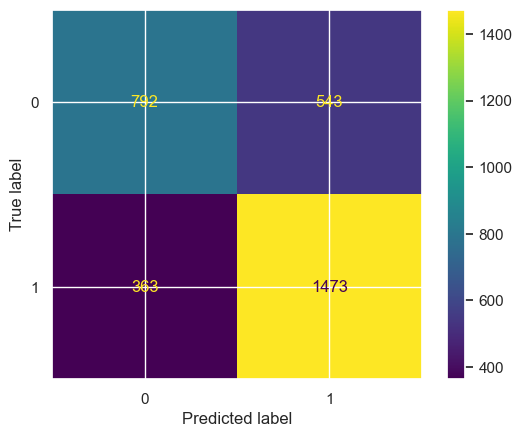

In [208]:
from sklearn.metrics import  ConfusionMatrixDisplay
d = ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred_test_gd))
d.plot()
plt.show()

<Figure size 1200x1000 with 0 Axes>

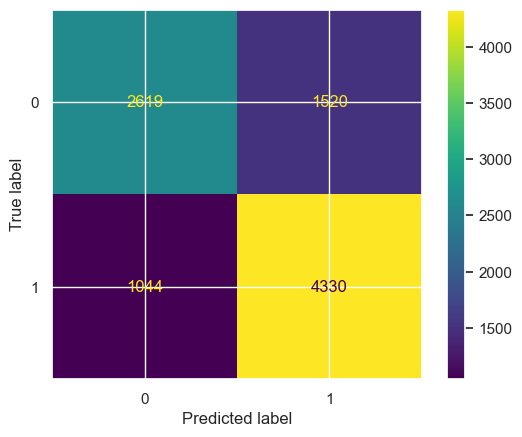

In [209]:
plt.figure(figsize =(12,10))
t = ConfusionMatrixDisplay(confusion_matrix(y_train , y_pred_train_gd))
t.plot()
plt.show()

In [210]:
from sklearn.metrics import roc_auc_score
gbm_roc_auc = roc_auc_score(y_test , y_pred_test_gd)
gbm_roc_auc

np.float64(0.6977730043328193)

In [211]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_gd)
display(fpr)
display(tpr)
display(thresholds)

array([0.        , 0.40674157, 1.        ])

array([0.        , 0.80228758, 1.        ])

array([inf,  1.,  0.])

In [212]:
plt.figure(figsize = (15 , 15))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve(area = %0.2f)' %gbm_roc_auc)
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR 
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR 
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [213]:
test_accuracy_logit_scaled = accuracy_score(y_test , y_pred_test_lr)
train_accuracy_logit_scaled = accuracy_score(y_test , y_pred_test_lr)

In [214]:
test_accuracy_logit_unscaled = accuracy_score(y_test , y_pred_test_unscaled)
train_accuracy_logit_unscaled = accuracy_score(y_train , y_pred_train_unscaled)

In [215]:
train_accuracy_dtree = accuracy_score(y_train , y_pred_train_dtree)
test_accuracy_dtree = accuracy_score(y_test , y_pred_test_dtree)

train_accuracy_rf = accuracy_score(y_train , y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test , y_pred_test_rf)

train_accuracy_svm = accuracy_score(y_train , y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test , y_pred_test_svm)

train_accuracy_knn = accuracy_score(y_train , y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test , y_pred_test_knn)

train_accuracy_gbm = accuracy_score(y_train , y_pred_train_gd)
test_accuracy_gbm = accuracy_score(y_test , y_pred_test_gd)

train_accuracy_xgb = accuracy_score(y_train , y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test , y_pred_test_xgb)


train_accuracy_ngb = accuracy_score(y_train , y_pred_train_ngb)
test_accuracy_ngb = accuracy_score(y_test , y_pred_test_ngb)

train_accuracy_nbr = accuracy_score(y_train , y_pred_train_nbr)
test_accuracy_nbr = accuracy_score(y_test , y_pred_test_nbr)

In [216]:
list1 = ['Logit Scaled' , 'Logit Unscaled' , 'Decision Tree' , 'Random Forest' , 'Support Vector' , 'KNN' ,'Gradient boosting',
        'XG Boost' , 'Naives-Guassian' , 'Naives-Bernoulli']

list2 = [train_accuracy_logit_scaled ,train_accuracy_logit_unscaled,train_accuracy_dtree,train_accuracy_rf,train_accuracy_svm,
        train_accuracy_knn,train_accuracy_gbm,train_accuracy_xgb,train_accuracy_ngb,train_accuracy_nbr]

list3 = [test_accuracy_logit_scaled ,test_accuracy_logit_unscaled,test_accuracy_dtree,test_accuracy_rf,test_accuracy_svm,
        test_accuracy_knn,test_accuracy_gbm,test_accuracy_xgb,test_accuracy_ngb,test_accuracy_nbr]

             ML ALGO  Train Accuracy  Test Accuracy
0       Logit Scaled        0.671082       0.671082
1     Logit Unscaled        0.691265       0.672343
2      Decision Tree        0.991590       0.673920
3      Random Forest        0.991590       0.743614
4     Support Vector        0.564911       0.578997
5                KNN        0.775465       0.649953
6  Gradient boosting        0.730474       0.714286
7           XG Boost        0.891937       0.761589
8    Naives-Guassian        0.615263       0.599811
9   Naives-Bernoulli        0.663303       0.643646
Axes(0.125,0.11;0.775x0.77)


/var/folders/q6/3kfkkjsd27df5fjd9ly07z4r0000gn/T/ipykernel_50893/2325760389.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)


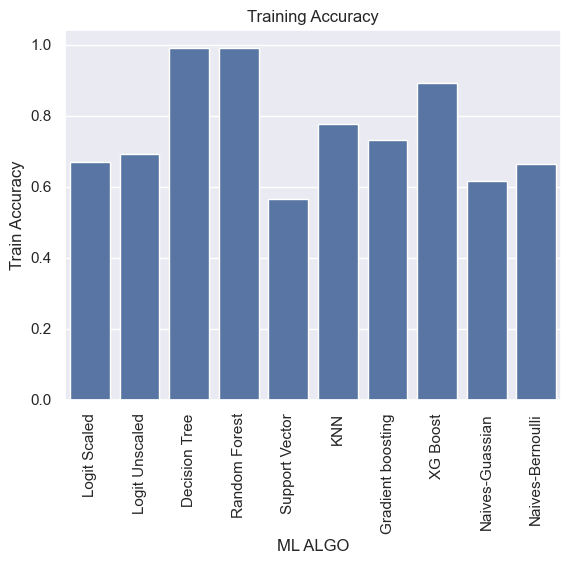

In [217]:
accuracy_df = pd.DataFrame({'ML ALGO': list1 , 'Train Accuracy' : list2 ,
                            'Test Accuracy' : list3})

print(accuracy_df)

charts = sns.barplot(x = 'ML ALGO' , y = 'Train Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Training Accuracy')
print(charts)

In [218]:
charts = sns.barplot(x = 'ML ALGO' , y = 'Test Accuracy' , data = accuracy_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Testing Accuracy')
print(charts)

Axes(0.125,0.11;0.775x0.77)


/var/folders/q6/3kfkkjsd27df5fjd9ly07z4r0000gn/T/ipykernel_50893/1449024736.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)


In [219]:
# Gradient Boosting Classifer is giving a good result 

In [220]:
cm = confusion_matrix(y_test , y_pred_test_gd)
pd.crosstab(y_test.flatten(), y_pred_test_gd, rownames=['Actual'], colnames=['Predicted'], margins = True)

Predicted     0     1   All
Actual                     
0           792   543  1335
1           363  1473  1836
All        1155  2016  3171

In [221]:
lr_roc_auc = roc_auc_score(y_test , y_pred_test_lr)
dtree_roc_auc = roc_auc_score(y_test , y_pred_test_dtree)
rf_roc_auc = roc_auc_score(y_test , y_pred_test_rf)
svm_roc_auc = roc_auc_score(y_test , y_pred_test_svm)
knn_roc_auc = roc_auc_score(y_test , y_pred_test_knn)
xgb_roc_auc = roc_auc_score(y_test , y_pred_test_xgb)
ngb_roc_auc = roc_auc_score(y_test , y_pred_test_ngb)
nbr_roc_auc = roc_auc_score(y_test , y_pred_test_nbr)

In [222]:
fpr,tpr,thresholds = roc_curve(y_test , y_pred_test_gd)
fpr1,tpr1,thresholds = roc_curve(y_test , y_pred_test_lr)
fpr2,tpr2,thresholds = roc_curve(y_test , y_pred_test_dtree)
fpr3,tpr3,thresholds = roc_curve(y_test , y_pred_test_rf)
fpr4,tpr4,thresholds = roc_curve(y_test , y_pred_test_svm)
fpr5,tpr5,thresholds = roc_curve(y_test , y_pred_test_knn)
fpr6,tpr6,thresholds = roc_curve(y_test , y_pred_test_xgb)
fpr7,tpr7,thresholds = roc_curve(y_test , y_pred_test_ngb)
fpr8,tpr8,thresholds = roc_curve(y_test , y_pred_test_nbr)

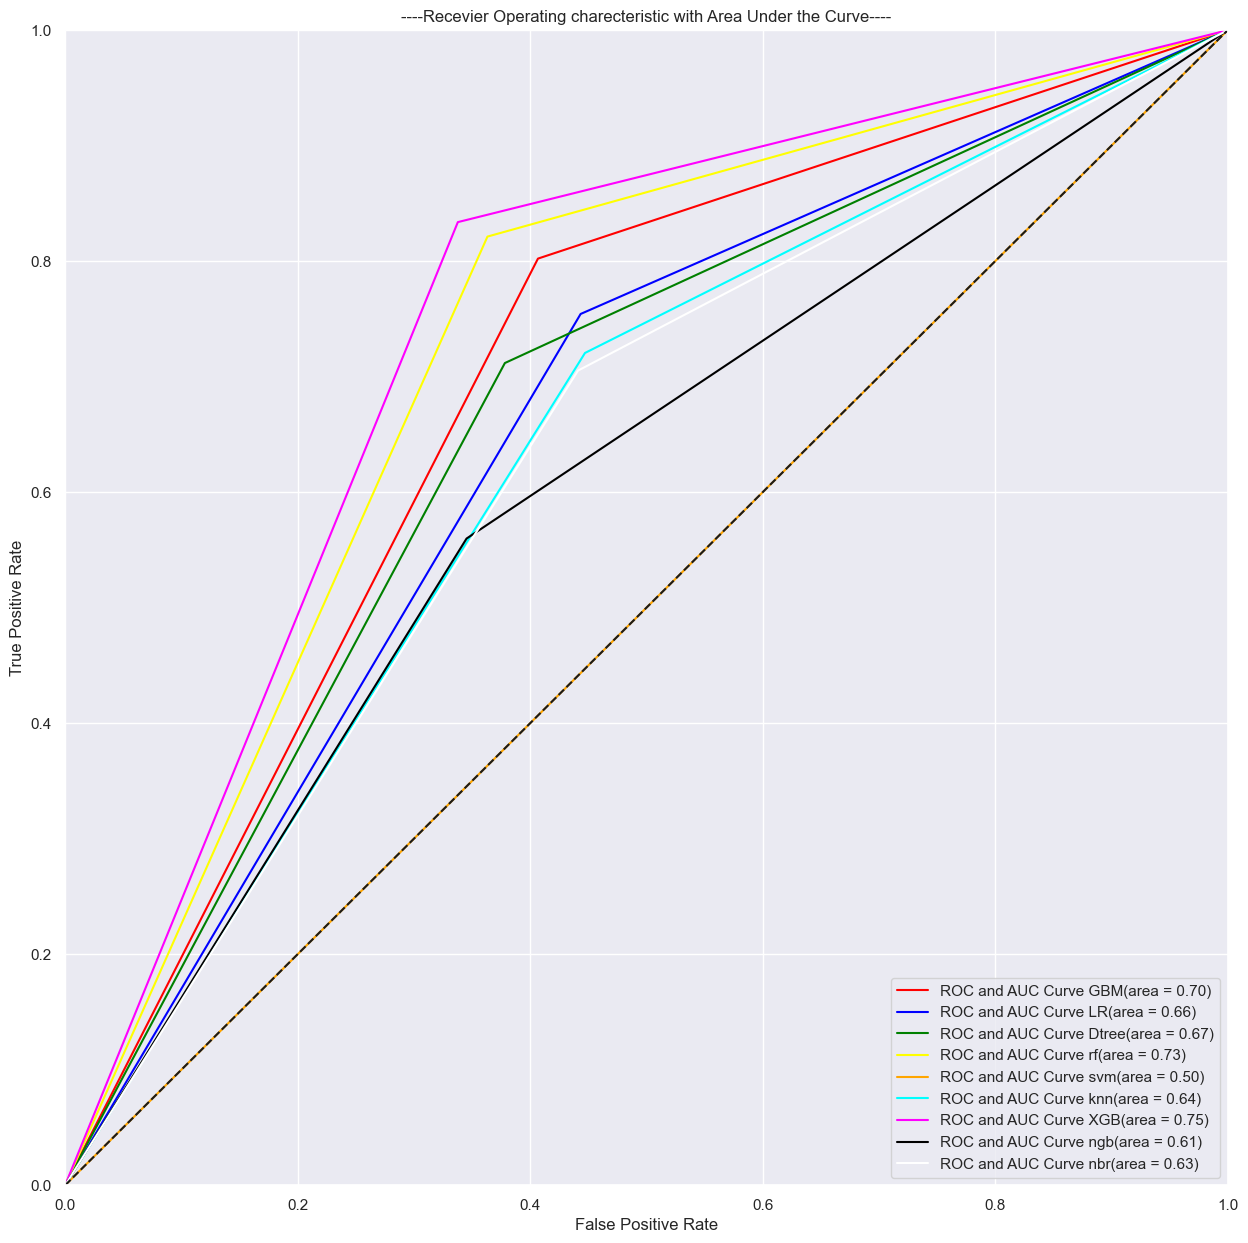

In [223]:
plt.figure(figsize = (15 , 15))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve GBM(area = %0.2f)' %gbm_roc_auc,color = 'red')
plt.plot(fpr1, tpr1, label = 'ROC and AUC Curve LR(area = %0.2f)' %lr_roc_auc , color = 'blue')
plt.plot(fpr2, tpr2, label = 'ROC and AUC Curve Dtree(area = %0.2f)' %dtree_roc_auc , color = 'green')
plt.plot(fpr3, tpr3, label = 'ROC and AUC Curve rf(area = %0.2f)' %rf_roc_auc , color = 'yellow')
plt.plot(fpr4, tpr4, label = 'ROC and AUC Curve svm(area = %0.2f)' %svm_roc_auc , color = 'orange')
plt.plot(fpr5, tpr5, label = 'ROC and AUC Curve knn(area = %0.2f)' %knn_roc_auc , color = 'cyan')
plt.plot(fpr6, tpr6, label = 'ROC and AUC Curve XGB(area = %0.2f)' %xgb_roc_auc , color = 'magenta')
plt.plot(fpr7, tpr7, label = 'ROC and AUC Curve ngb(area = %0.2f)' %ngb_roc_auc , color = 'black')
plt.plot(fpr8, tpr8, label = 'ROC and AUC Curve nbr(area = %0.2f)' %nbr_roc_auc , color = 'white')
plt.plot([0,1] , [0,1] , 'k--')
#plotting against TPR and FPR 
#TPR range is 0 to 1 i.e 0 to 100% hence [0,1]
#similarly for FPR 
plt.xlim([0.0,1.0]) #---> 0 to 100 %
plt.ylim([0.0,1.0]) #---> 0 to 100 %
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [224]:
accuracy_df.to_csv('accuracy_df.csv')

In [227]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [228]:
print('training accu xgb :' , accuracy_score(y_train , y_pred_train_xgb))
print('testing accu xgb :' , accuracy_score(y_test , y_pred_test_xgb))

training accu xgb : 0.8919373488909913
testing accu xgb : 0.7615894039735099


In [229]:
training_accuracy_cv_rf = cross_val_score(rf , x_train , y_train , cv = 10)
testing_accuracy_cv_rf = cross_val_score(rf , x_test , y_test , cv = 10)
print('training_accuracy', training_accuracy_cv_rf )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_rf )
print()
print('***************')
print()

training_accuracy [0.75210084 0.73844538 0.73109244 0.76340694 0.7402734  0.76130389
 0.74132492 0.75184017 0.73922187 0.74763407]
***************
testing_accuracy [0.68553459 0.65930599 0.70662461 0.69716088 0.70347003 0.67823344
 0.68769716 0.67192429 0.70977918 0.70031546]

***************



In [230]:
print('training_accuracy', training_accuracy_cv_rf.mean() )
print('***************')
print('testing_accuracy' ,testing_accuracy_cv_rf.mean())

training_accuracy 0.7466643913085739
***************
testing_accuracy 0.6900045632204432


In [236]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [237]:
data_1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'direction_opp', 'Accept', 'drive_time'],
      dtype='object')

In [235]:
data_2.columns

Index(['temperature', 'Accept', 'destination_0', 'destination_1',
       'passanger_0', 'passanger_1', 'passanger_2', 'weather_0', 'weather_1',
       'coupon_0', 'coupon_1', 'coupon_2', 'coupon_3', 'expiration_1',
       'gender_1', 'age_0', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'maritalStatus_0', 'maritalStatus_1', 'maritalStatus_2',
       'maritalStatus_3', 'education_0', 'education_1', 'education_2',
       'education_3', 'education_4', 'occupation_0', 'occupation_1',
       'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5',
       'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9',
       'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13',
       'occupation_14', 'occupation_15', 'occupation_16', 'occupation_17',
       'occupation_18', 'occupation_19', 'occupation_20', 'occupation_21',
       'occupation_22', 'occupation_23', 'income_0', 'income_1', 'income_2',
       'income_3', 'income_4', 'income_5', 'income_6', 

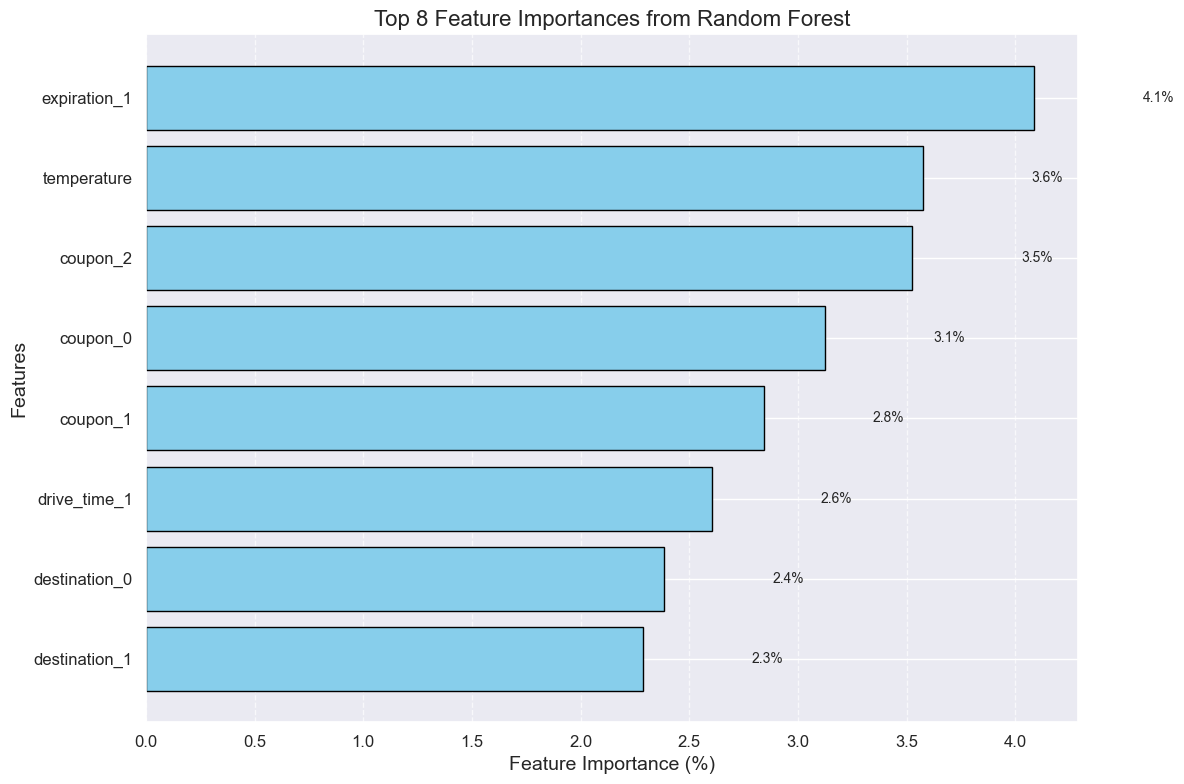

In [238]:
# Assuming df is your preprocessed dataset
# Split features (X) and target (y)
X = data_2.drop(columns=['Accept'])  # Replace 'is_claim' with your target column name
y = data_2['Accept']

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances * 100  # Convert to percentages
}).sort_values(by='Importance', ascending=False)

# Slice to include only the top 8 features
top_8_features = importance_df.head(8)

# Plot horizontal bar chart for top 8 features
plt.figure(figsize=(12, 8))  # Adjust size for better visibility
bars = plt.barh(top_8_features['Feature'], top_8_features['Importance'], color='skyblue', edgecolor='black')

# Add data labels to each bar as percentages
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', va='center', fontsize=10)

# Add gridlines, titles, and labels
plt.xlabel('Feature Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 8 Feature Importances from Random Forest', fontsize=16)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

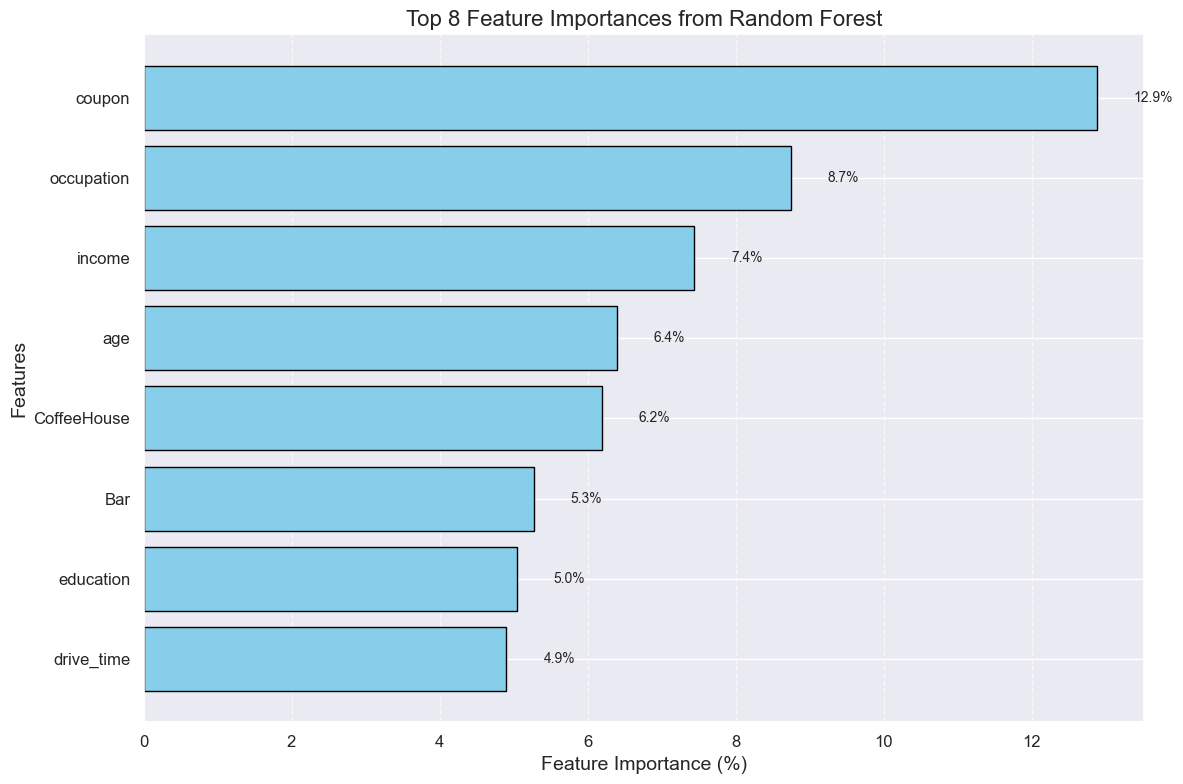

In [239]:
# Assuming df is your preprocessed dataset
# Split features (X) and target (y)
X = data_1.drop(columns=['Accept'])  # Replace 'is_claim' with your target column name
y = data_1['Accept']

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances * 100  # Convert to percentages
}).sort_values(by='Importance', ascending=False)

# Slice to include only the top 8 features
top_8_features = importance_df.head(8)

# Plot horizontal bar chart for top 8 features
plt.figure(figsize=(12, 8))  # Adjust size for better visibility
bars = plt.barh(top_8_features['Feature'], top_8_features['Importance'], color='skyblue', edgecolor='black')

# Add data labels to each bar as percentages
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', va='center', fontsize=10)

# Add gridlines, titles, and labels
plt.xlabel('Feature Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 8 Feature Importances from Random Forest', fontsize=16)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()